# Kenya Agricultural Market Insights and Forecasting System with Sentiment Analysis Project

## BUSINESS UNDERSTANDING

### Business Overview
Economic and livelihood concerns are critical issues in Kenya, impacting a substantial portion of the population. The agricultural sector, which is a major contributor to Kenya's economy, faces numerous challenges, including price volatility, market inefficiencies, and fluctuating public sentiment. These issues directly affect farmers' and traders' livelihoods, making it essential to develop data-driven solutions to address these concerns.


##### Stakeholders and Their Gains
1. Farmers (Small-Scale & Large-Scale)

🔹 Gains:

- Informed decisions on when and where to sell their produce for maximum profit.
- Insights into seasonal price trends to optimize crop production cycles.
- Awareness of public sentiment that may impact market demand.

2. Traders & Distributors (Wholesalers & Retailers)

🔹 Gains:

- Forecasting tools to plan optimal buying and selling times.
- Reduction in losses due to unexpected price drops.
- Better logistics planning by analyzing regional price variations.

3. Policymakers & Government Agencies (Ministry of Agriculture, KNBS, NDMA, etc.)

🔹 Gains:

- Data-backed policy formulation for price stabilization and market interventions.
- Early warning systems for food security and drought preparedness.
- Understanding of market inefficiencies to improve agricultural policies.

4. Financial Institutions & Investors (Banks, Microfinance Institutions, Agribusiness Investors)

🔹 Gains:

- Credit risk assessment based on market trends and price stability.
- Informed decisions on investing in agriculture-related ventures.
- Development of agricultural insurance products based on price volatility analysis.

5. Consumers (General Public)

🔹 Gains:

- Awareness of expected price changes for household budgeting.
- More stable prices due to better market efficiency.
- Potential for lower food costs as market inefficiencies decrease.

6. Researchers & Data Scientists

🔹 Gains:

- A valuable dataset for further analysis and model improvements.
- Opportunities to develop new methodologies for price forecasting and sentiment analysis.
- Enhanced understanding of the relationship between social sentiment and economic trends.

### Problem Statement
Kenya's agricultural markets are characterized by significant price fluctuations across different regions and commodities. Factors such as seasonal variations, market demand, and public perception contribute to these fluctuations. For instance, maize prices can vary dramatically based on the time of year and the region, impacting farmers' decisions on when and where to sell their produce. Additionally, public sentiment, as expressed on social media platforms like Twitter, can influence market dynamics, further complicating the decision-making process for stakeholders.


### Main Objective
Develop a comprehensive system that leverages advanced data science techniques to analyze and forecast commodity prices, monitor market trends, and incorporate sentiment analysis. This system aims to provide actionable insights to farmers, traders, and policymakers, enabling informed decisions and improving market efficiency and stability. Time series forecasting will be achieved through graphical analysis. Regression analysis and sentiment analysis will play critical roles in predicting commodity prices and understanding public sentiment, respectively, thereby enhancing the overall accuracy and relevance of market predictions.


### Specific Objectives
1.	Assess Commodity Price Fluctuations

- Evaluate the price volatility of various commodities across different regions and time periods
- Identify the factors contributing to price fluctuations, such as seasonal variations, market demand, and public sentim

2.	Analyze Market Trends:
   
- Monitor market trend s and patterns in commodity prices using historical data and advanced analytics.
- Develop predictive models to forecast future market trends and price movements ent

3.	Incorporate Sentiment Analysis:

- Leverage sentiment analysis on social media data, particularly from Twitter, to assess public perception of agricultural markets. 
- Develop machine learning models to quantify the relationship between sentiment trends and commodity price fluctuations, enabling more accurate market predictions.

### Success Metrics

#### Forecasting Model Accuracy (Commodity Price Prediction)

| Metric | Target Range | Ideal Goal | Comments                                      |
|--------|--------------|------------|-----------------------------------------------|
| MAE    | 5–20 KES     | < 10 KES   | Lower values indicate better predictions.     |
| RMSE   | 10–30 KES    | < 15 KES   | Penalizes large errors more than MAE.         |
| R²     | 0.70–0.95    | > 0.85     | Higher values mean better model fit.          |

*Ideal Target:* MAE < 10 KES, RMSE < 15 KES, R² > 0.85  
(If commodity prices vary widely, normalize error metrics based on average price ranges.)

#### Sentiment Analysis Performance

| Metric    | Target Range | Ideal Goal | Comments                                                  |
|-----------|--------------|------------|-----------------------------------------------------------|
| Precision | 70–95%       | > 85%      | Measures how many positive sentiment predictions were correct. |
| Recall    | 65–90%       | > 80%      | Measures how well the model captures all positive sentiments.  |
| F1-Score  | 75–90%       | > 85%      | Balances precision and recall.                             |

*Ideal Target:* F1-Score > 85%, Precision & Recall > 80%

## Data understanding


The data used in this project originates from various sources, including historical commodity prices, geographical information, and sentiment data from social media platforms.

1. The primary dataset contains Food Prices data for Kenya, sourced from the Kenya Agricultural Market Information System [KAMIS](https://kamis.kilimo.go.ke/site/market?product=153&per_page=10), developed by the Ministry of Agriculture, Livestock, Fisheries, and Cooperatives. This database covers foods such as maize, rice, beans, fish, and sugar,is updated weekly(though mostly contains monthly data). The platform offers data on commodity prices, trade volumes, and market highlights

2. Geographical Information:

-	Data on the location and characteristics of different agricultural markets in Kenya.
-	Includes information on regional variations in market conditions and infrastructure.

3. Sentiment Data from Social Media:
    
- Data collected from social media platforms like Twitter, capturing public sentiment related to agricultural markets.
- Includes information on public perception, opinions,  and discussions about commodity prices and market dynamics.




## Understanding rows and columns of our data

In [1]:
#importing necessary libraries
import pandas as pd
import glob
import os
#from geopy.geocoders import Nominatim
import warnings
import time
import sys
import matplotlib.pyplot as plt


# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path
from visualization import *
#from geolocate import geolocate_markets
#from scrape_kamis import scrape_kamis


# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data
wfpdata = pd.read_csv('Data\wfp_food_prices_ken.csv')
wfpdata.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041
3,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705


In [3]:
#getting an overview and summary of dataframe
wfpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12865 entries, 0 to 12864
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       12865 non-null  object
 1   admin1     12825 non-null  object
 2   admin2     12825 non-null  object
 3   market     12865 non-null  object
 4   latitude   12825 non-null  object
 5   longitude  12825 non-null  object
 6   category   12865 non-null  object
 7   commodity  12865 non-null  object
 8   unit       12865 non-null  object
 9   priceflag  12865 non-null  object
 10  pricetype  12865 non-null  object
 11  currency   12865 non-null  object
 12  price      12865 non-null  object
 13  usdprice   12865 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


From the above, it is found that the data has 12865 rows 14 columns of object datatype. 

In [4]:
#getting descriptive statistics of df
wfpdata.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,12865,12825,12825,12865,12825,12825,12865,12865,12865,12865,12865,12865,12865,12865
unique,229,8,22,63,62,62,9,48,14,3,3,2,5768,9408
top,15/04/2021,Rift Valley,Turkana,Nairobi,-1.283333,36.816667,cereals and tubers,Maize (white),KG,actual,Retail,KES,10,0.4625
freq,429,5352,2722,1108,1108,1108,5803,1303,5785,8002,6458,12864,312,21


The most common values in individual rows are displayed on the "top" column. Since all columns in the data are of object datatype, statistical information on the dataset cannot be displayed. 


In [5]:
# url = 'https://kamis.kilimo.go.ke/site/market?product=73&per_page=50000'
# scrape_kamis(url, 'Meat Beef.csv')


From the KAMIS website, were able to scrap data about different commodities as seperate excel files(CSV). The code below identifies all CSV files in the directory using glob, then iterates through each file, reading its contents -into individual Pandas DataFrames. These DataFrames are stored in a list and later concatenated into a single DataFrame (combined_df).


In [6]:
# Set the directory containing your CSV files
csv_directory = ".\\Data\\Products"  # Replace with the path to your directory

# Use glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Initialize an empty list to hold DataFrames
data_frames = []

# Iterate over the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# printing part of the combined dataframe
combined_df

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Meat Beef,-,-,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11
1,Meat Beef,-,-,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06
2,Meat Beef,-,-,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31
3,Meat Beef,-,-,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28
4,Meat Beef,-,-,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22
...,...,...,...,...,...,...,...,...,...,...
288473,Beans (Yellow-Green),-,-,-,Gikomba,-,150.00/Kg,NaN,Nairobi,2021-05-24
288474,Beans (Yellow-Green),-,-,-,Eldama Ravine,100.00/Kg,120.00/Kg,300.0,Baringo,2021-05-24
288475,Beans (Yellow-Green),-,-,-,Kongowea,95.56/Kg,110.00/Kg,900.0,Mombasa,2021-05-24
288476,Beans (Yellow-Green),-,-,-,Makutano West Pokot,140.00/Kg,200.00/Kg,NaN,West-Pokot,2021-05-24


The combined dataframe encompanses different variety of foods over different markets in Kenya alongside their prices over a period of time. Their supply volume is also indicated. Combined, the dataframe spans 288478 rows and 10 columns. 

In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
dtypes: float64(1), object(9)
memory usage: 22.0+ MB


The dataset contains 288,478 records and 10 columns. 9 columns contain text (object) datatype, 1 column (Supply Volume) contains numeric (float64) datatype. Supply Volume: Only 175,498 out of 288,478 rows have values. County: Almost complete, but 561 records have missing values. Other columns are fully populated, but some might contain placeholder values.

In [8]:
combined_df.describe()

,Supply Volume
count,1.754980e+05
mean,7.809961e+03
std,4.115118e+05
min,0.000000e+00
25%,5.000000e+02
50%,1.500000e+03
75%,4.300000e+03
max,1.000000e+08


The above indicates statistical description of the Supply Volume column in the dataset, since it is the only numerical column. 

## DATA CLEANING

In data cleaning, we will ensure the dataset is accurate, relevant, consistent, complete, and uniform. This involves verifying data points against trusted sources, removing inaccuracies and outliers, filtering out irrelevant information that does not help in our analysis. We will also address inconsistent data formats, check naming conventions, ensuring a uniform structure across datasets, as well as identifying and filling null values to achieve completeness.
These steps are vital in maintaining data quality.

In [9]:
# Find latitudes and longitudes for markets
# geolocate_markets(combined_df)


The Geopy library was used to convert market names into coordinates while ensuring all locations are within Kenya. To optimize performance, it stores previously searched locations in a cache to avoid redundant API calls. The script iterates through the dataset, processes each market, and adds the coordinates to new columns in the DataFrame. Finally, it saves the updated data to a CSV file named "combined_with_coordinates.csv" for further analysis.

In [10]:
# Loading the new combined dataset with coordinates
products_df = pd.read_csv('.\\Data\\combined_with_coordinates.csv')

In [11]:
# Looking at the data's info
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
 10  latitude        199401 non-null  float64
 11  longitude       199401 non-null  float64
dtypes: float64(3), object(9)
memory usage: 26.4+ MB


From the above, there are 12 rows and 288478 columns, with some columns having missing values. All columns are of object datatype except the longitude, latitude, and supply volume.

In [12]:
# Finding statistical description of numerical columns in the dataset
products_df.describe()

,Supply Volume,latitude,longitude
count,1.754980e+05,199401.000000,199401.000000
mean,7.809961e+03,-0.686573,36.237790
std,4.115118e+05,1.435692,1.794955
min,0.000000e+00,-4.622956,34.138607
25%,5.000000e+02,-1.166037,34.763182
50%,1.500000e+03,-0.274214,35.834422
75%,4.300000e+03,0.129513,37.250000
max,1.000000e+08,3.709823,55.454533


A commodity category mapping should be created to classify different commodities into broader food categories like vegetables and fruits, cereals and tubers, pulses and nuts, meat, fish and eggs, and milk and dairy. The mapping ensures consistency when analyzing or visualizing data. Using the .map() function, each commodity in the products_df DataFrame is assigned its respective category based on the dictionary. This step is crucial for easier aggregation, comparison, and trend analysis of different commodity groups in the dataset.

In [13]:
# Finding unique classifications on the products dataframe
products_df['Classification'].unique()

array(['-', 'White Maize', 'Mixed-Traditional', 'Yellow Maize', 'IRR',
       'Dola', 'Jembe', 'Hostess', 'Equatorial afya ugali', 'Ajab',
       'Amaize', '210(two ten)', 'Ugali Afya', 'Taifa', 'Soko',
       'Raha Premium', 'Pembe', 'Oryx', 'Ndovu', 'Mama', 'Jogoo wimbi',
       'Jogoo', 'Tajiri maize meal', 'Kifaru', 'Cosmo', 'Shujaa',
       'Posho Mill', 'Jimbi', 'Unga afya', 'Canna', 'Jamii',
       'Organic (cassava, sorghum &maize)', 'Twiga',
       'Organic (maize&cassava flour)',
       'Organic ( millet, sorghum & maize flour )', 'Kiki maize meal',
       'Supreme', 'Dried', 'Fried', 'Fresh', 'Fillet', 'Sindano',
       'Pishori'], dtype=object)

In [14]:
# Commodity categories mapping
commodity_category_mapping = {
    'Meat Beef': 'meat, fish and eggs',
    'Cabbages': 'vegetables and fruits',
    'Banana (Cooking)': 'vegetables and fruits',
    'Cowpea leaves (Kunde)': 'vegetables and fruits',
    'Cowpeas': 'pulses and nuts',
    'Dry Onions': 'vegetables and fruits',
    'Dry Maize': 'cereals and tubers',
    'Finger Millet': 'cereals and tubers',
    'Maize Flour': 'cereals and tubers',
    'Kales/Sukuma Wiki': 'vegetables and fruits',
    'Omena': 'meat, fish and eggs',
    'Red Irish potato': 'cereals and tubers',
    'Cow Milk(Processd)': 'milk and dairy',
    'Beans Red Haricot (Wairimu)': 'pulses and nuts',
    'Red Sorghum': 'cereals and tubers',
    'Rice': 'cereals and tubers',
    'Banana (Ripening)': 'vegetables and fruits',
    'Spinach': 'vegetables and fruits',
    'Wheat': 'cereals and tubers',
    'Beans (Yellow-Green)': 'pulses and nuts'
}
# Map commodities to categories
products_df['Category'] = products_df['Commodity'].map(commodity_category_mapping)

# Display the updated DataFrame
products_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category
0,Meat Beef,-,-,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11,0.083501,34.720326,"meat, fish and eggs"
1,Meat Beef,-,-,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06,0.083501,34.720326,"meat, fish and eggs"
2,Meat Beef,-,-,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31,0.083501,34.720326,"meat, fish and eggs"
3,Meat Beef,-,-,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28,0.083501,34.720326,"meat, fish and eggs"
4,Meat Beef,-,-,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22,0.083501,34.720326,"meat, fish and eggs"


In [15]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
 10  latitude        199401 non-null  float64
 11  longitude       199401 non-null  float64
 12  Category        288478 non-null  object 
dtypes: float64(3), object(10)
memory usage: 28.6+ MB


From analysis, the 'Sex' amd 'Grade' column are not necessary for our assessment, and hence should be dropped

In [16]:
products_df.drop(columns= ['Sex','Grade'], inplace=True,axis=1)

We are supposed to change the retail and wholesale prices into float values. However, each is attached to a unit of measurement, for example, maize measured in kilograms and milk measured in litres. The units will be seperated from the prices, added to another column, and the prices converted to float64 format. 

In [17]:
# Extract the numeric values and units
products_df['Unit'] = products_df['Retail'].str.extract(r'([a-zA-Z/-]+)')  # Extract unit
products_df['Retail'] = products_df['Retail'].str.extract(r'([\d.]+)').astype(float)  # Extract number

products_df['Wholesale'] = products_df['Wholesale'].str.extract(r'([\d.]+)').astype(float)  # Extract number

We created a markup percentage column that shows the percentage profits for different commodities in different markets

In [18]:
#Create a markup column and calculate the percentage
products_df['Markup %'] = ((products_df['Retail'] - products_df['Wholesale']) / products_df['Wholesale']) * 100

Next thing to be done is to change the 'Date' column into date-time format for easier analysis of trends.

In [ ]:
# Changing Date column into date time format
products_df['Date'] = pd.to_datetime(products_df['Date'])
# Checking to ensure changes have reflected
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Commodity       288478 non-null  object        
 1   Classification  288478 non-null  object        
 2   Market          288478 non-null  object        
 3   Wholesale       250559 non-null  float64       
 4   Retail          211049 non-null  float64       
 5   Supply Volume   175498 non-null  float64       
 6   County          287917 non-null  object        
 7   Date            288478 non-null  datetime64[ns]
 8   latitude        199401 non-null  float64       
 9   longitude       199401 non-null  float64       
 10  Category        288478 non-null  object        
 11  Unit            288478 non-null  object        
 12  Markup %        173482 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 28.6+ MB


All datatypes have been changed successfully. 

### Dealing with Outliers

In [20]:
products_df.describe()

,Wholesale,Retail,Supply Volume,Date,latitude,longitude,Markup %
count,250559.000000,211049.000000,1.754980e+05,288478,199401.000000,199401.000000,1.734820e+05
mean,76.154645,119.711842,7.809961e+03,2019-08-18 08:42:08.603221248,-0.686573,36.237790,6.104690e+02
min,0.010000,0.010000,0.000000e+00,2005-02-01 00:00:00,-4.622956,34.138607,-9.999831e+01
25%,25.000000,50.000000,5.000000e+02,2021-05-24 00:00:00,-1.166037,34.763182,1.428571e+01
50%,45.000000,80.000000,1.500000e+03,2022-02-16 00:00:00,-0.274214,35.834422,2.500000e+01
75%,80.000000,125.000000,4.300000e+03,2023-02-07 00:00:00,0.129513,37.250000,5.000000e+01
max,480030.000000,411188.970000,1.000000e+08,2025-02-12 00:00:00,3.709823,55.454533,5.999900e+06
std,1055.093880,1069.669102,4.115118e+05,NaN,1.435692,1.794955,2.746895e+04


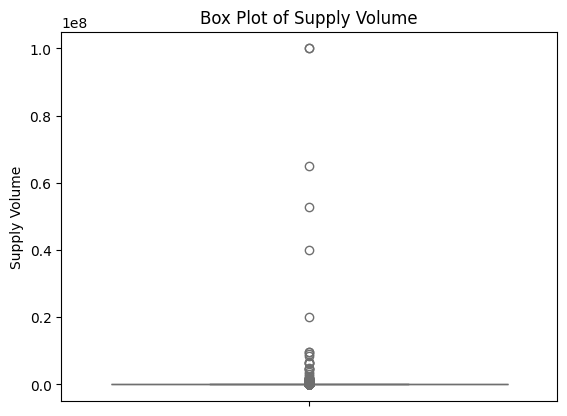

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=products_df['Supply Volume'], color='skyblue').set(title='Box Plot of Supply Volume', ylabel='Supply Volume')
plt.show();

We plotted a

In [22]:
# finding the number of outliers in the supply volume column
supply_count=products_df['Supply Volume'] > 1e+05
supply_count.value_counts()

Supply Volume
False    287946
True        532
Name: count, dtype: int64

In [23]:
# drop outliers
products_df.drop(products_df[products_df['Supply Volume'] > 1e+05].index, inplace=True)

In [24]:
# confirming outliers have been dropped
supply_count1=products_df['Supply Volume'] > 1e+05
supply_count1.value_counts()

Supply Volume
False    287946
Name: count, dtype: int64

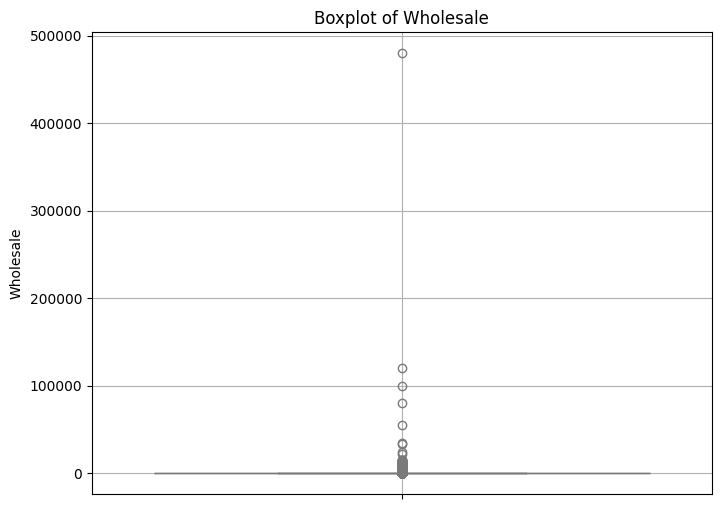

In [25]:
plot_boxplot(products_df, "Wholesale")


Checked for outliers in the new wholesale column  found them to be extreme outliers.Some values had upto 480,000 per unit which is unrealistic.

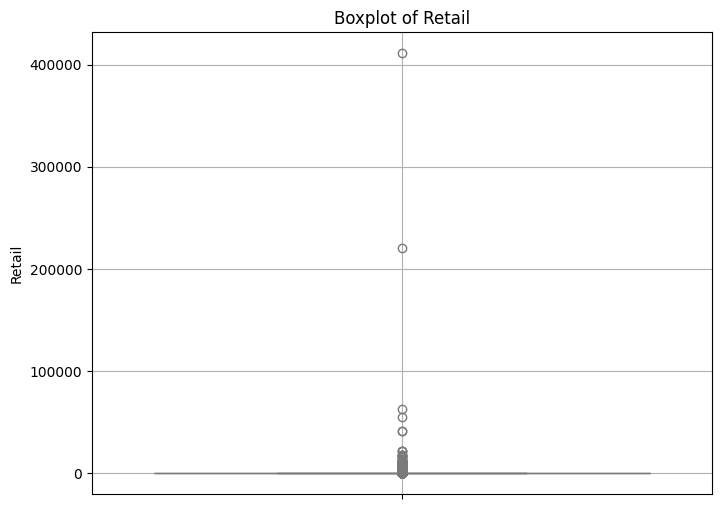

In [26]:
plot_boxplot(products_df, "Retail")

Also checked for outliers in the retail column which were also  extreme.Some values were over 400,000 per unit which is also unrealistic and were also above the 75th Percentile.

In [27]:
products_df = products_df[(products_df['Wholesale'] <= 1000) & (products_df['Wholesale'] >= 10)]
products_df = products_df[(products_df['Retail'] <= 1000) & (products_df["Retail"] >= 10)].reset_index()

In [28]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168367 entries, 0 to 168366
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           168367 non-null  int64         
 1   Commodity       168367 non-null  object        
 2   Classification  168367 non-null  object        
 3   Market          168367 non-null  object        
 4   Wholesale       168367 non-null  float64       
 5   Retail          168367 non-null  float64       
 6   Supply Volume   150242 non-null  float64       
 7   County          167880 non-null  object        
 8   Date            168367 non-null  datetime64[ns]
 9   latitude        125037 non-null  float64       
 10  longitude       125037 non-null  float64       
 11  Category        168367 non-null  object        
 12  Unit            168367 non-null  object        
 13  Markup %        168367 non-null  float64       
dtypes: datetime64[ns](1), float64(6), in

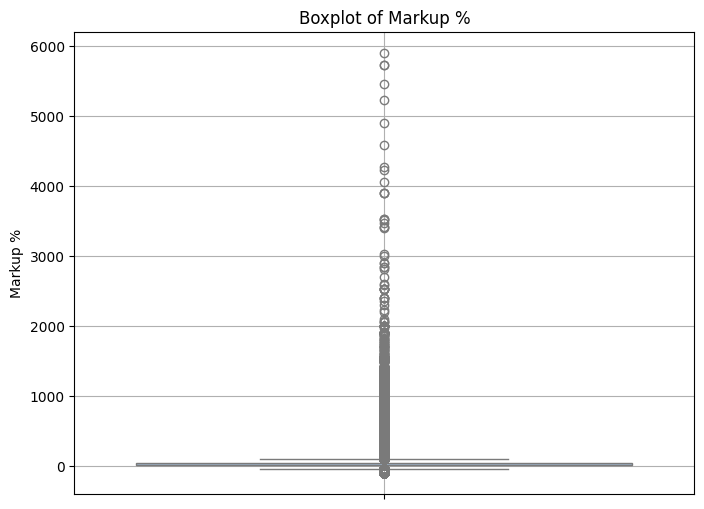

In [29]:
plot_boxplot(products_df, "Markup %")


In [30]:
products_df = products_df[(products_df['Markup %'] >-50) & (products_df['Markup %'] <1500)]
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167441 entries, 0 to 168366
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           167441 non-null  int64         
 1   Commodity       167441 non-null  object        
 2   Classification  167441 non-null  object        
 3   Market          167441 non-null  object        
 4   Wholesale       167441 non-null  float64       
 5   Retail          167441 non-null  float64       
 6   Supply Volume   149411 non-null  float64       
 7   County          166959 non-null  object        
 8   Date            167441 non-null  datetime64[ns]
 9   latitude        124303 non-null  float64       
 10  longitude       124303 non-null  float64       
 11  Category        167441 non-null  object        
 12  Unit            167441 non-null  object        
 13  Markup %        167441 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1

### Handling Missing Values

In [31]:
#Checking for nulls
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 index              0.000000
Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale          0.000000
Retail             0.000000
Supply Volume     10.767972
County             0.287863
Date               0.000000
latitude          25.763105
longitude         25.763105
Category           0.000000
Unit               0.000000
Markup %           0.000000
dtype: float64


Checked for any missing values in the Products dataset and found 4 columns had mising values. They include: Supply volume 10%, Latitude and Longitude at 25% each and County had 0.2%.

In [32]:
# Compute median values for each commodity
supply_medians = products_df.groupby('Commodity')[['Supply Volume']].median()

# Print median values before imputing
print(supply_medians)

# Function to impute missing values with median
def impute_supply_median(row):
    if pd.isna(row['Supply Volume']):
        row['Supply Volume'] = supply_medians.loc[row['Commodity'], 'Supply Volume']
    return row

# Apply imputation
products_df = products_df.apply(impute_supply_median, axis=1)


                             Supply Volume
Commodity                                 
Beans (Yellow-Green)                1080.0
Beans Red Haricot (Wairimu)          900.0
Cabbages                            4000.0
Cow Milk(Processd)                   852.0
Cowpea leaves (Kunde)                400.0
Cowpeas                              800.0
Dry Maize                           4800.0
Dry Onions                          2500.0
Finger Millet                        750.0
Kales/Sukuma Wiki                   1050.0
Maize Flour                         3240.0
Meat Beef                           1200.0
Omena                               1000.0
Red Irish potato                    3800.0
Red Sorghum                          900.0
Rice                                2200.0
Spinach                              500.0
Wheat                                900.0


In [33]:
# print the new null percentages for each column
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 index              0.000000
Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale          0.000000
Retail             0.000000
Supply Volume      0.000000
County             0.287863
Date               0.000000
latitude          25.763105
longitude         25.763105
Category           0.000000
Unit               0.000000
Markup %           0.000000
dtype: float64


Checked for missing values again and confimed that the supply volume column now had none. The remaining column with nulls are Latitude and Longitude at 25% each and County had 0.2%.

Longitude and Latitude columns contain geographical data and there is no way to impute those missing values. County column has 0.2% nulls which is a neglible amount.

We decided to drop all the remaining observations with nulls since there was no risk of lossing a lot of data.

In [34]:
#drop remaining records with nulls
products_df=products_df.dropna(axis=0).reset_index()

In [35]:
# check for missing percentages again
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

products_df.info()

percentage of nulls 
 level_0           0.0
index             0.0
Commodity         0.0
Classification    0.0
Market            0.0
Wholesale         0.0
Retail            0.0
Supply Volume     0.0
County            0.0
Date              0.0
latitude          0.0
longitude         0.0
Category          0.0
Unit              0.0
Markup %          0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124303 entries, 0 to 124302
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   level_0         124303 non-null  int64         
 1   index           124303 non-null  int64         
 2   Commodity       124303 non-null  object        
 3   Classification  124303 non-null  object        
 4   Market          124303 non-null  object        
 5   Wholesale       124303 non-null  float64       
 6   Retail          124303 non-null  float64       
 7   Supply Volume   124303 non-null  float64

The dataframe now has no missing values and contains 124303 rows with 14 columns.

In [36]:
#Check for duplicates
products_df.duplicated().value_counts()

False    124303
Name: count, dtype: int64

There are null values in the retail and wholesale columns of the data. 

In [37]:
# Checking the number values in the dataset
print(products_df['Commodity'].value_counts())

Commodity
Dry Maize                      14068
Cabbages                       14064
Dry Onions                     13995
Kales/Sukuma Wiki              11892
Red Irish potato                9608
Beans (Yellow-Green)            9413
Spinach                         8357
Finger Millet                   6747
Cowpeas                         5987
Rice                            5472
Cowpea leaves (Kunde)           5093
Omena                           5078
Beans Red Haricot (Wairimu)     2995
Meat Beef                       2964
Maize Flour                     2552
Cow Milk(Processd)              2174
Wheat                           1974
Red Sorghum                     1870
Name: count, dtype: int64


In [38]:
# confirm the number of remaining records
products_df.shape

(124303, 15)

The dataset now has 124,303 records which is a good number of observations.

#### Univariate Analysis

**Analysis of distribution of supply volume**

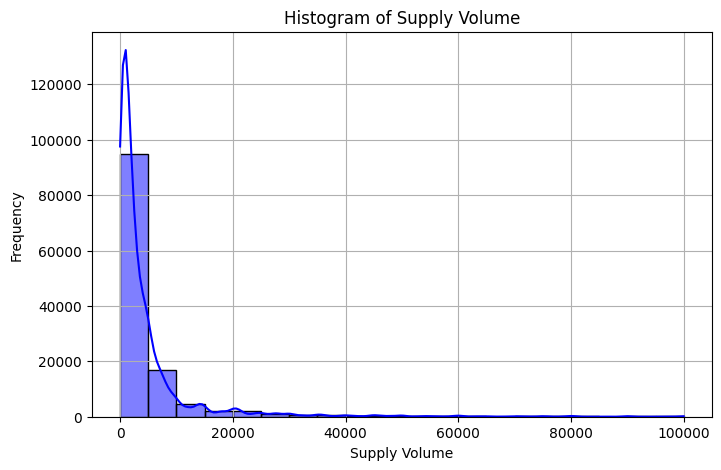

In [39]:
# Plotting histogram of supply volume to check for outliers
from scripts.visualization import plot_histogram

plot_histogram(products_df, 'Supply Volume')


Analysis of the Supply Volume column shows that it is not normally distributed. It is skewed to the left. The histogram's positive skewness indicates that most commodities have low supply volumes, with only a few having high volumes. This distribution suggests that high supply volumes might indicate high-demand commodities, while low volumes could point to niche or specialized products. Consequently, high-volume commodities may experience stable prices, whereas low-volume commodities might have higher or more volatile prices.

**Distribution of Dates in our dataset**


Let's look at the distribution of Dates in the dataset.

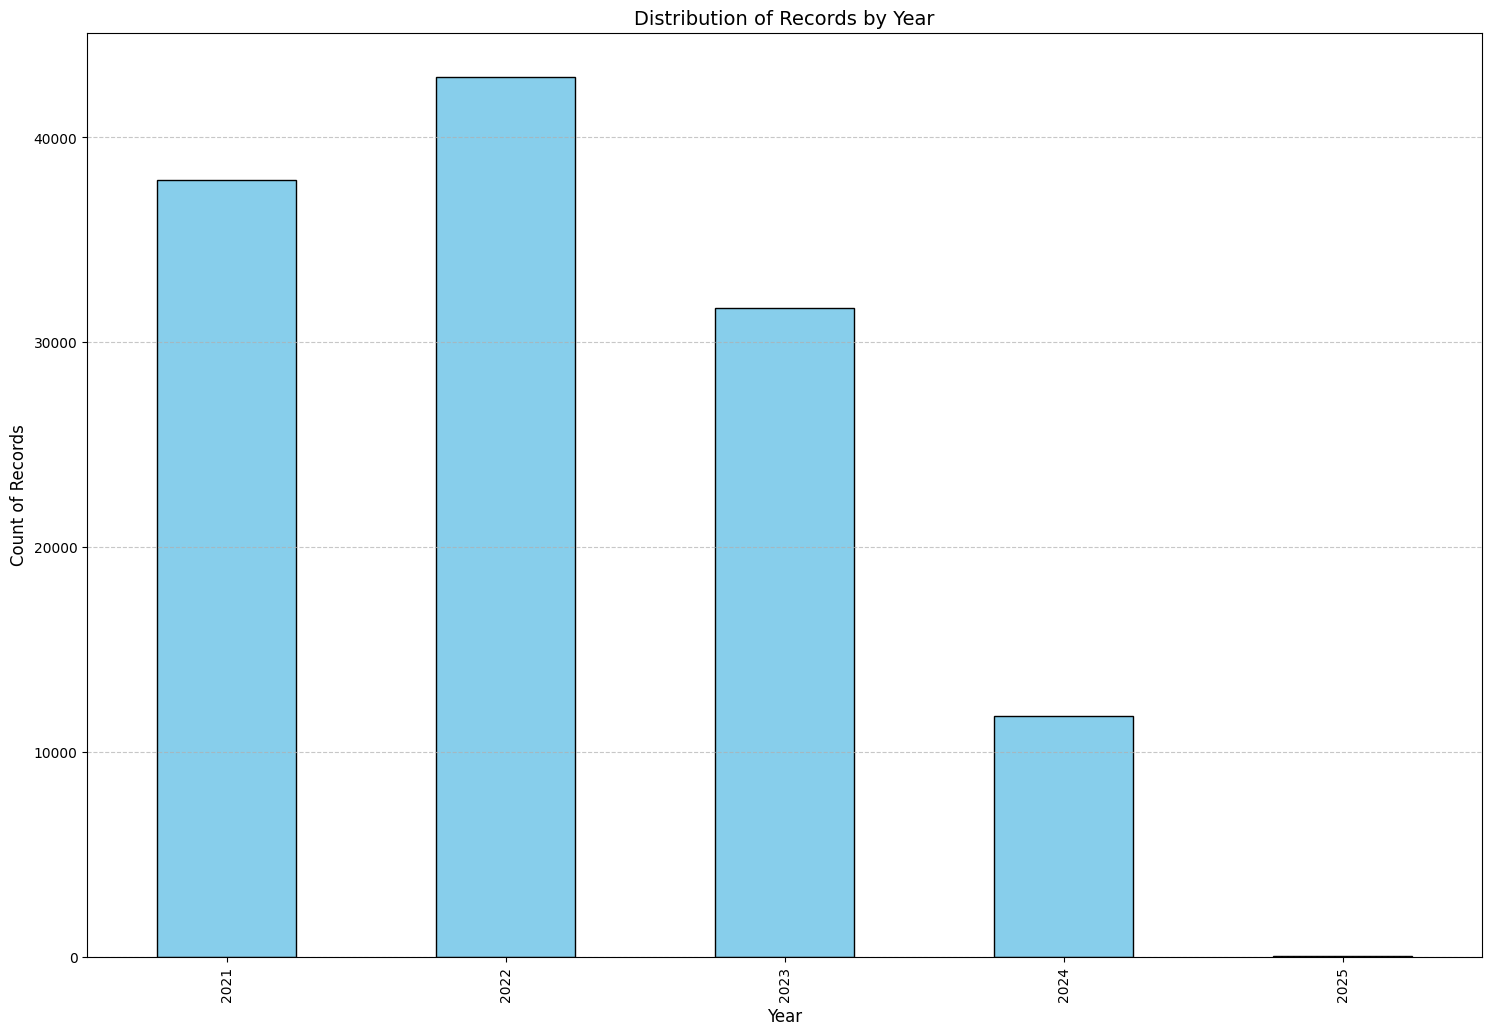

In [40]:
# Extract month-year period from the Date column
df = products_df.copy()
df['YearMonth'] = products_df['Date'].dt.to_period('Y')

# Count the number of records for each month-year
month_year_counts = df['YearMonth'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(18, 12))
month_year_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Records by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Records", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bulk of the data collected is post-Covid from 2021 to as recently as 2025. This makes it very relevant for this study and generating modern day actionable insights.

**Frequency of records per commodity**


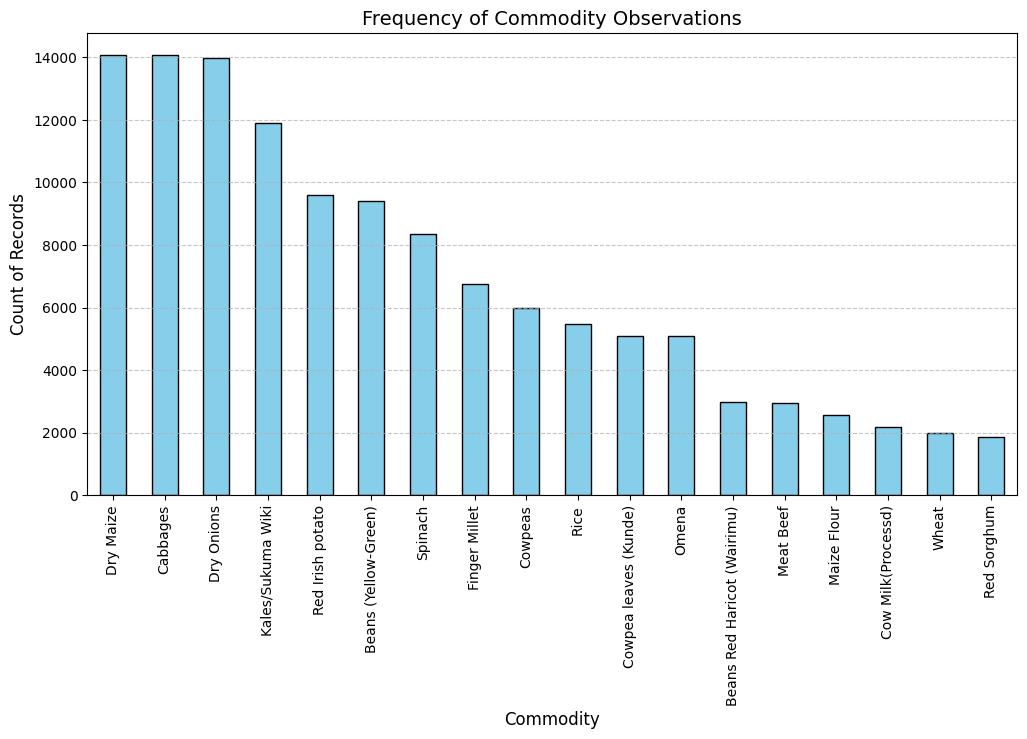

In [41]:
import matplotlib.pyplot as plt

#Bar Chart of Commodity Counts
commodity_counts = products_df['Commodity'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))

commodity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Commodity Observations", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Count of Records", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dry maize are are the most populous commodity in the dataset closely followed cabbages and Dry Onions each with over 14,000 records. This might suggest they are either more frequently traded or consumed as these are major staple foods across many houselholds in Kenya. Processed Cow Milk, Wheat and  Red Sorghum variety are the least populous with all having just below 2500 records.  This could suggest factors like lower production, less widespread consumption, or less frequent recording in the data.

#### Bivariate Analysis

**The average retail prices of commodities per month**

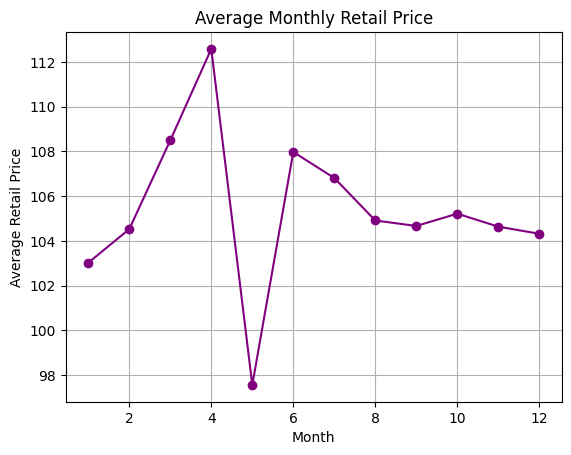

In [57]:
# Seasonal Trends
products_df['Month'] = products_df['Date'].dt.month
monthly_trends = products_df.groupby('Month')['Retail'].mean()
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title("Average Monthly Retail Price")
plt.xlabel("Month")
plt.ylabel("Average Retail Price")
plt.grid(True)
plt.show()

- January to April coincides with preparation for Planting Season. The primary planting season in Kenya typically commences in [March](https://oneacrefund.org/articles/behind-scenes-seed-and-fertilizer-procurement). To prepare, farmers may retain a portion of their produce for seeds, further limiting the amount available in the market and contributing to price increases. 
- The April to June period aligns with the beginning of the [long rains](https://www.nathab.com/know-before-you-go/african-safaris/east-africa/weather-climate/kenya/) season, leading to the harvest of certain crops. This influx can increase supply for specific commodities, potentially lowering their prices. 
- Between June and December, Kenya experiences a notable decline in food prices, influenced by increased Agricultural Production. [Favorable weather conditions](https://www.nathab.com/know-before-you-go/african-safaris/east-africa/weather-climate/kenya/), including adequate rainfall, leads to improved harvests. This boost in agricultural output increased the supply of staple foods, contributing to price reductions.

**Top 20 markets with the biggest supply volumes**


Top 20 Markets by Total Supply Volume:
 Market
Bondo                   32878091.00
Eldoret Main            28558314.00
Kutus                   26168605.21
Kagio                   20984668.00
Aram                    20108919.87
Daraja Mbili            17998753.00
Kongowea                16657903.00
Kakuma Modern Market    14873950.00
Diani Market            13716921.60
Akala                   11259752.00
Chuka                   10815664.00
Ngong market            10683664.00
Kapkwen                  9860424.00
Rongo                    9648877.97
Maua                     9498000.00
Keroka                   9316667.55
Kiritiri                 9219056.00
Webuye town              8863220.00
Marigat                  8408931.00
Soko mpya                8115530.90
Name: Supply Volume, dtype: float64


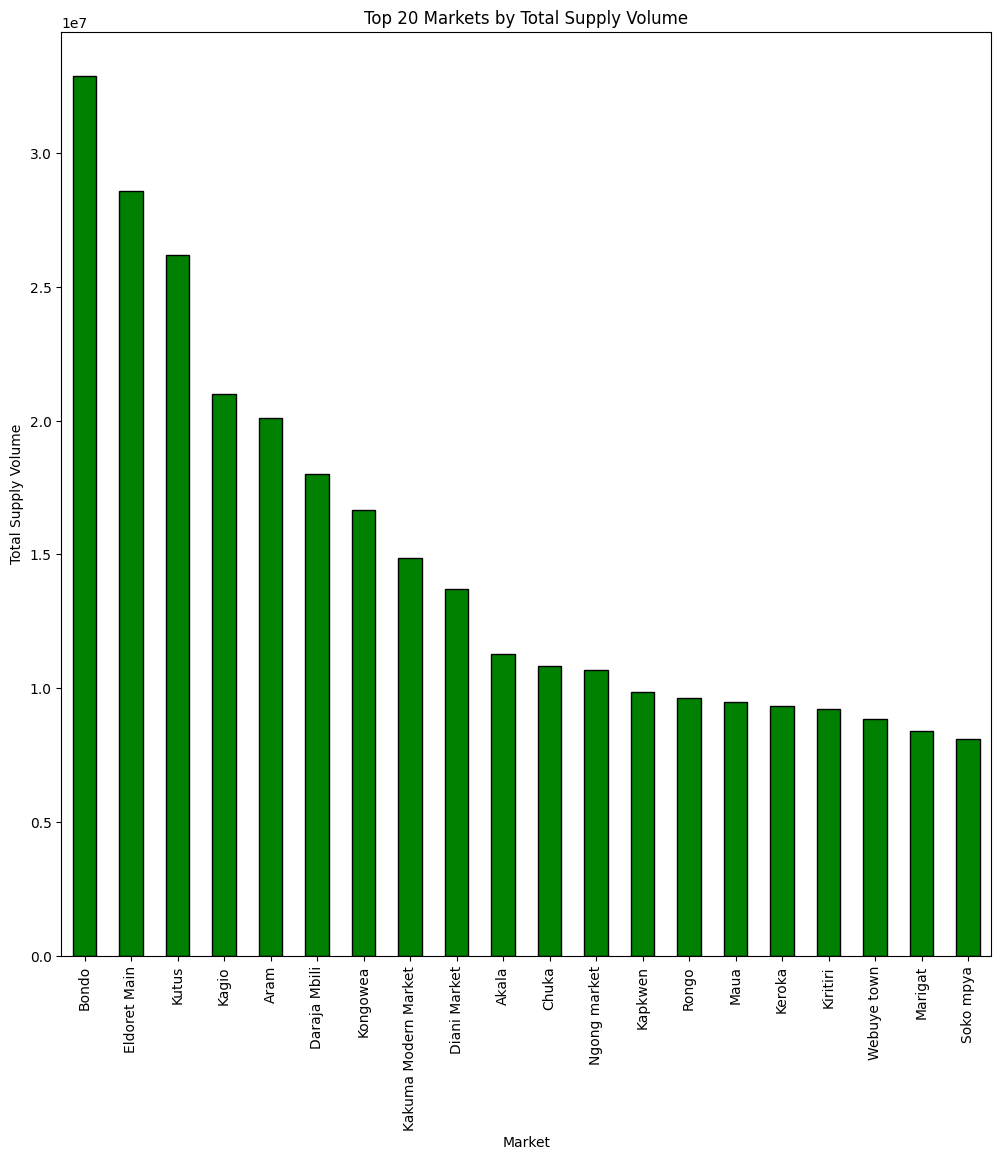

In [58]:
# Plotting top 20 markets by total supply volume
top_markets_by_supply = products_df.groupby('Market')['Supply Volume'].sum().nlargest(20)
print("\nTop 20 Markets by Total Supply Volume:\n", top_markets_by_supply)
top_markets_by_supply.plot(kind='bar', color='green', edgecolor='black', figsize=(12, 12))
plt.title("Top 20 Markets by Total Supply Volume")
plt.xlabel("Market")
plt.ylabel("Total Supply Volume")
plt.show()

This graph depicts the top 20 Kenyan markets by total supply volume. Bondo Market significantly surpasses all others, indicating its dominance as a major distribution hub.  A wide range of supply volumes exists among the remaining top 20, reflecting varying market sizes and demand. The graph suggests a concentration of supply within these key markets.
Geographic distribution of these markets (e.g., Bondo, Kutus, ) can allow for potential regional economic analysis when combined with location data.

**Comparison of the retail prices of different commodity categories**


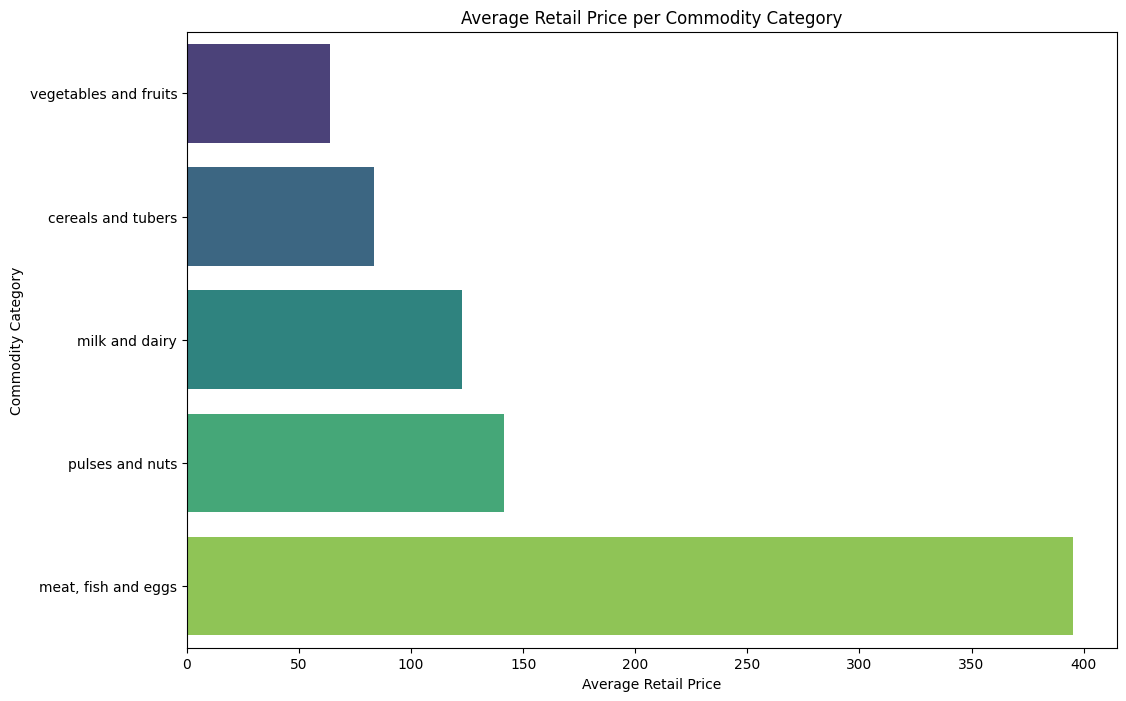

In [59]:
# Calculate the average retail price per category
category_avg_price = products_df.groupby('Category')['Retail'].mean().sort_values()

# Plot the average retail price per category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_avg_price.values, y=category_avg_price.index, palette='viridis')
plt.title('Average Retail Price per Commodity Category')
plt.xlabel('Average Retail Price')
plt.ylabel('Commodity Category')
plt.show()

The bar graph represents the Average price details per category of the commodities. Categories like meat, fish and eggs are generally expensive considering they have the highest average retail price. Staples like maize, beans, or vegetables tend to be more affordable. The categories appear to have a gradual increase in price, with a clear disparity between the highest and lowest-priced commodities. The pricing difference could be influenced by supply chain costs, seasonal availability or import dependencies.

**The supply volume of each commodity**


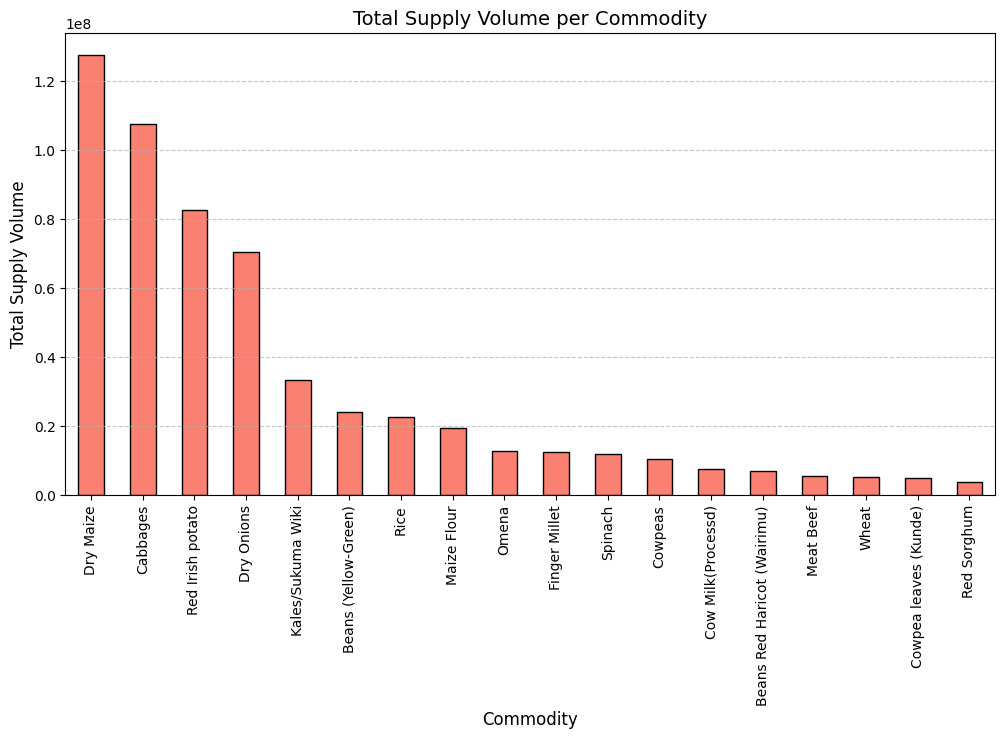

In [60]:
# Bar Chart of Total Supply Volume per Commodity
commodity_supply = products_df.groupby('Commodity')['Supply Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
commodity_supply.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Total Supply Volume per Commodity", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Total Supply Volume", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The graph depicts the total supply volume of various agricultural commodities. It highlights the varying levels of **production and availability** for different agricultural products, with Dry Maize clearly dominating the supply, followed by Cabbages and Red Irish Potatoes. Commodities such as Wheat, Cowpea leaves,and Meat Beef, among others, have notably lower supply volumes. This disparity in supply volume likely has implications for market prices, food security, and agricultural planning within the region represented.

**Analysis of average retail prices from 2021 to date**


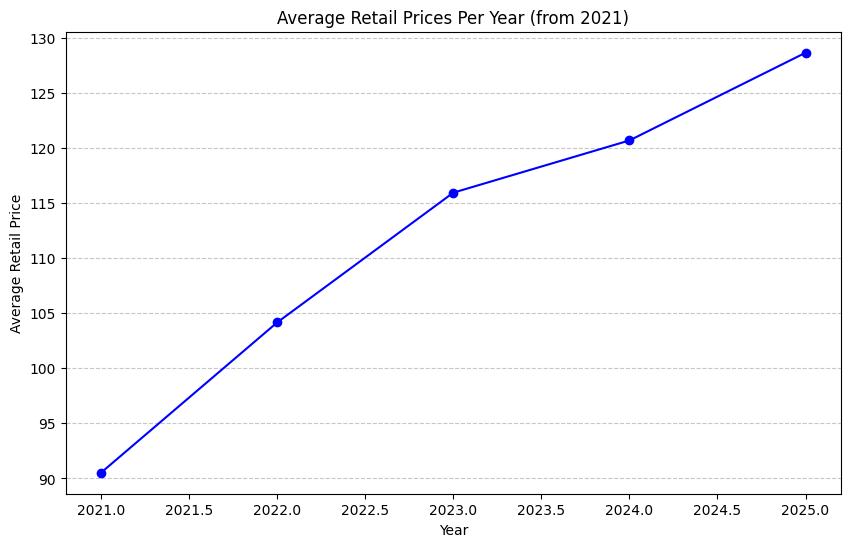

In [61]:
import matplotlib.pyplot as plt

# Filter the data from 2021 onwards
df_filtered_2021 = products_df[products_df['Date'].dt.year >= 2021]

# Calculate the average retail prices per year
average_prices_per_year = df_filtered_2021.groupby(
	df_filtered_2021['Date'].dt.year)['Retail'].mean()
	# Plot the average prices per year as a line graph

# Plot the average prices per year
plt.figure(figsize=(10, 6))
average_prices_per_year.plot(kind='line', color='blue', marker='o')
plt.title("Average Retail Prices Per Year (from 2021)")
plt.xlabel("Year")
plt.ylabel("Average Retail Price")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kenyan food prices rose steadily from 2021 to 2025.  A sharp jump in 2022 likely stemmed from the [Russia-Ukraine conflict's impact on global food and energy markets](https://doi.org/10.1111/1467-8268.12728). Continued increases reflect lingering conflict effects, [climate change](https://dicf.unepgrid.ch/kenya/climate-change), [global economic factors](https://www.carbonbrief.org/experts-what-is-causing-food-prices-to-spike-around-the-world/), and other internal factors, underscoring Kenya's vulnerability to international price shocks.

**Multivariate Analysis**

**Relationship between supply volume of commodities and their retail prices**


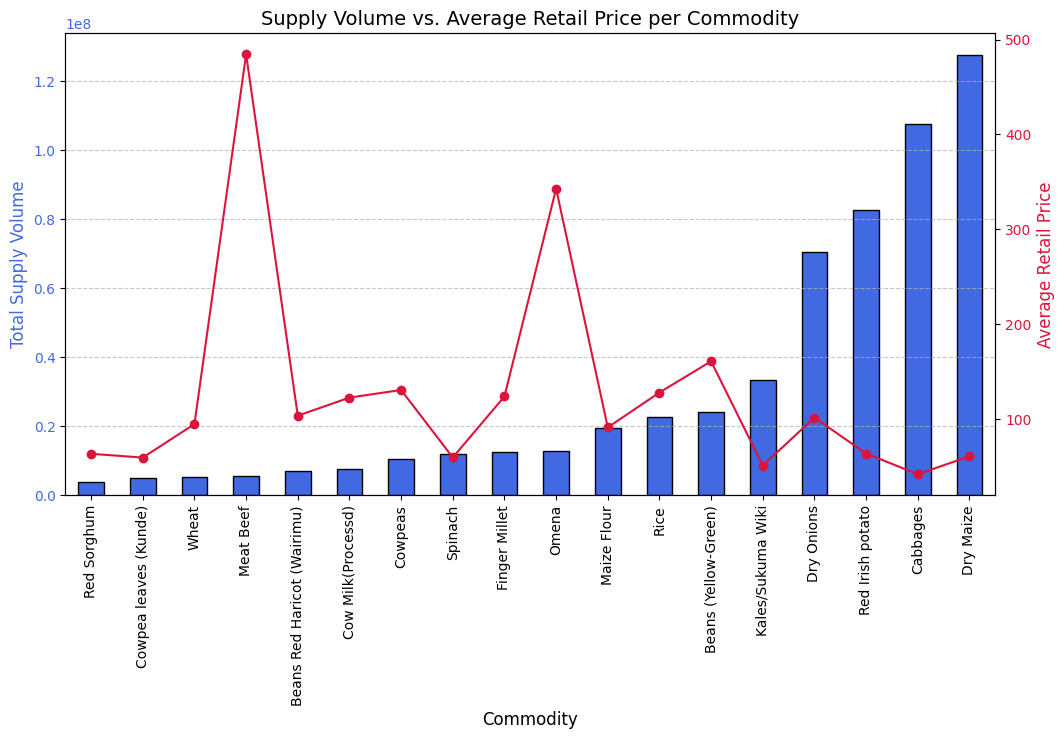

In [62]:
# Aggregate supply volume and average retail price per commodity
commodity_stats = products_df.groupby('Commodity').agg({'Supply Volume': 'sum', 'Retail': 'mean'}).sort_values('Supply Volume')

# Plot supply volume as bars and retail price as a line
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for supply volume
commodity_stats['Supply Volume'].plot(kind='bar', color='royalblue', edgecolor='black', ax=ax1)
ax1.set_ylabel("Total Supply Volume", fontsize=12, color='royalblue')
ax1.set_xlabel("Commodity", fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticklabels(commodity_stats.index, rotation=90)

# Line plot for average retail price
ax2 = ax1.twinx()
commodity_stats['Retail'].plot(kind='line', color='crimson', marker='o', ax=ax2)
ax2.set_ylabel("Average Retail Price", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Titles and grid
plt.title("Supply Volume vs. Average Retail Price per Commodity", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The graph shows an inverse relationship between supply volume and retail price. When supply is low, prices spike sharply, as seen in two major peaks. This likely means there were shortages at those points, driving prices higher. But as supply increases, prices start to stabilize and even decline. The pattern suggests that when more of a product is available, the market naturally corrects itself, making things more affordable. It’s a classic case of how availability influences cost.

**The average markup of each commodity**


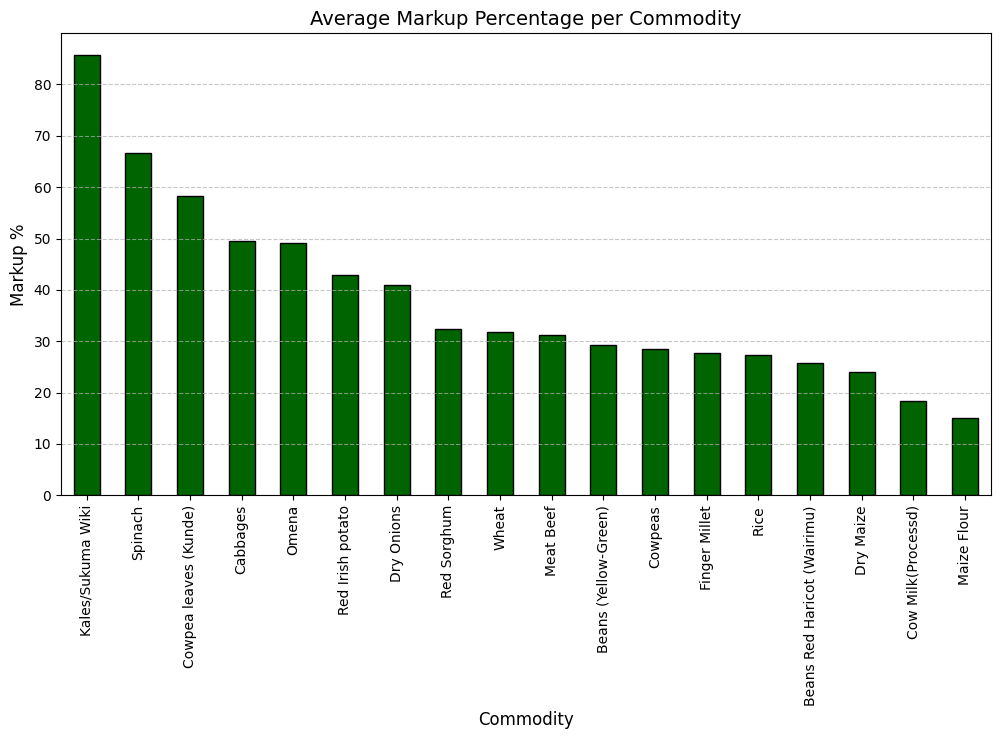

In [63]:
# Aggregate average markup percentage per commodity
commodity_markup = products_df.groupby('Commodity')['Markup %'].mean().sort_values(ascending=False)

# Plot markup percentage
plt.figure(figsize=(12, 6))
commodity_markup.plot(kind='bar', color='darkgreen', edgecolor='black')

plt.title("Average Markup Percentage per Commodity", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Markup %", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Bars extending higher on the graph indicate a greater markup percentage for the corresponding commodity. A high markup suggests either a profitable market or potentially inflated prices which according to the graph Kales/Sukuma Wiki variety, have a greater markup percentage compared to the rest of the commodities, while a low markup indicates a smaller difference between cost and selling price as seen in maize flour.

**Trend of commodity prices over time**


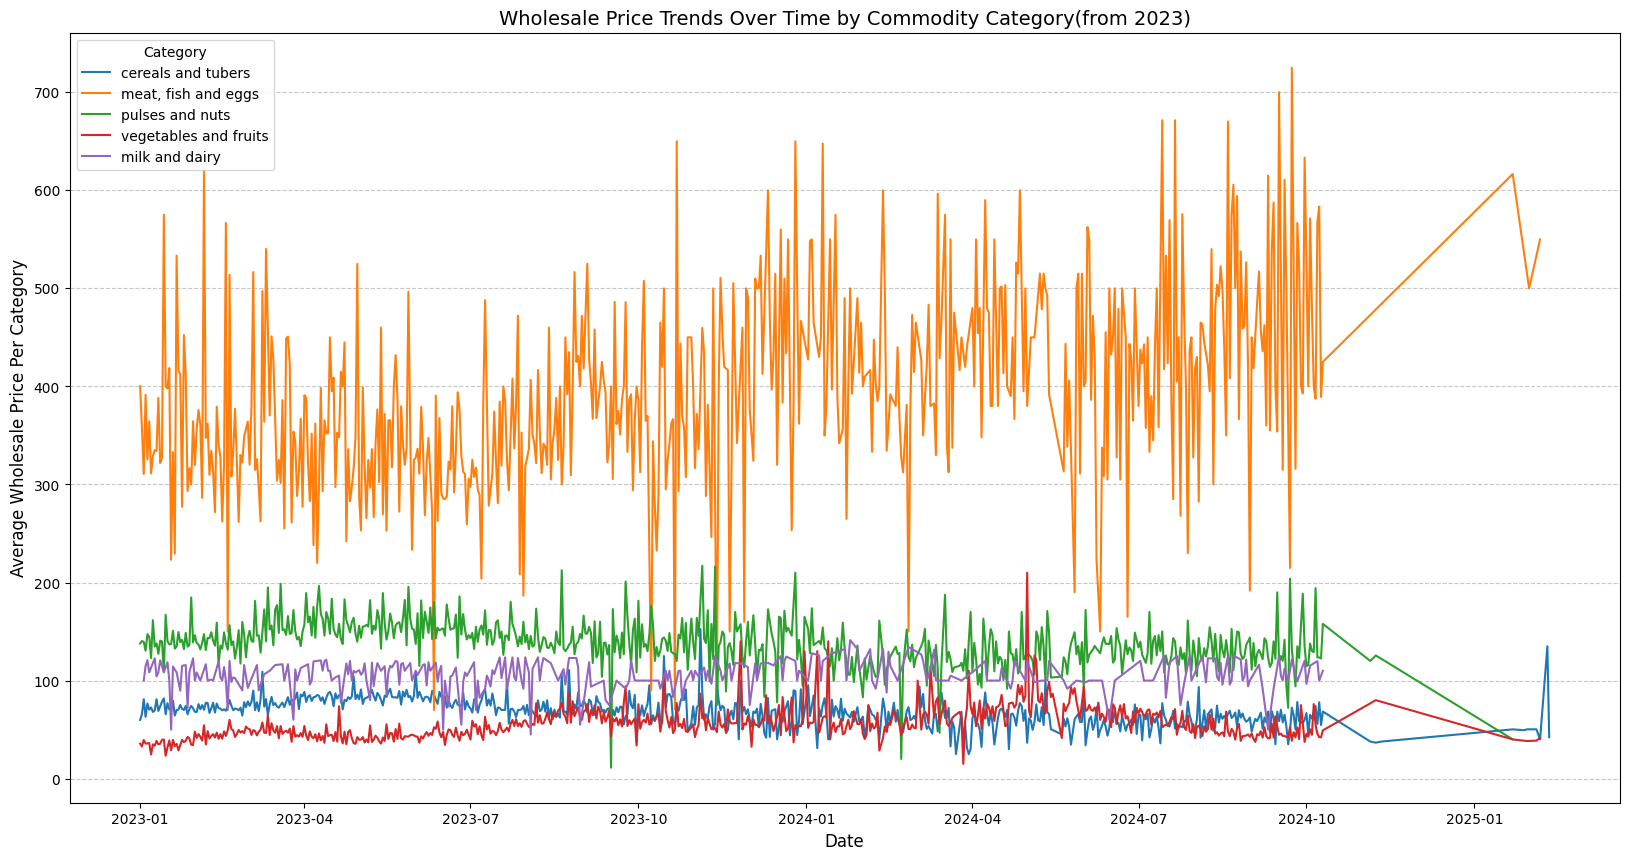

In [64]:
# Group data by category and date, then calculate the average wholesale price per category over time
df_category_trends = products_df.groupby(['Date', 'Category'])['Wholesale'].mean().reset_index()

# Filter data for records from 2023 onwards
df_category_trends = df_category_trends[df_category_trends['Date'].dt.year >= 2023]

# Plot price trends over time for different categories
plt.figure(figsize=(20, 10))
for category in df_category_trends['Category'].unique():
    subset = df_category_trends[df_category_trends['Category'] == category]
    plt.plot(subset['Date'], subset['Wholesale'], linestyle='-', label=category)

plt.title("Wholesale Price Trends Over Time by Commodity Category(from 2023)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Wholesale Price Per Category", fontsize=12)
plt.legend(title="Category",loc='upper left')  # Legend outside for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

This plot shows the price stability of different commodity categories for the past 2 years.

The "meat, fish, and eggs" category (orange line) consistently has the highest wholesale prices.
There are noticeable price spikes, suggesting seasonal effects, supply shortages, or market disruptions.

Categories like "cereals and tubers" (blue) and "pulses and nuts" (green) have relatively stable price trends over time, with minimal fluctuations.

"Milk and dairy" category(purple) exhibits occasional large spikes, possibly due to supply chain issues or sudden demand surges. 

Some categories experience extreme short-term price increases, e.g., "meat, fish, and eggs" around October 2023 and "milk and dairy" around mid-2024. From domain research, these spikes can be attributed to the following factors:

In October 2023, Kenya experienced a significant increase in egg prices. This surge was primarily due to escalating transportation and production costs and increased cost of poultry feed largely driven by rising fuel prices, as reported in this [article by Food Business Africa](https://www.foodbusinessafrica.com/egg-prices-on-the-rise-in-kenya-due-to-economic-challenges/?utm_source=chatgpt.com).

In mid-2024, the dairy industry faced rising operational costs, including higher expenses for animal feed, labor, fuel and government intervention to increase milk prices to ensure fair compensation for dairy farmers. These increased costs coupled with reduced local supply were passed on to consumers, resulting in higher retail prices for milk and dairy products as reported by [ForkAgro](https://forkagro.com/en/news/v/rost-operacionnoj-sebestoimosti-moloka-v-2024-godu-vyzvan-mnozhestvom-faktorov-privodya-k-vozmozhnomu-uvelicheniyu-cen-na-molochnuyu-produkciyu?utm_source=chatgpt.com).

The price spikes observed in these categories during the specified periods were influenced by a combination of increased production and transportation costs, supply chain disruptions, and government policy interventions aimed at stabilizing the respective sectors

**Average prices of different commodities per county**


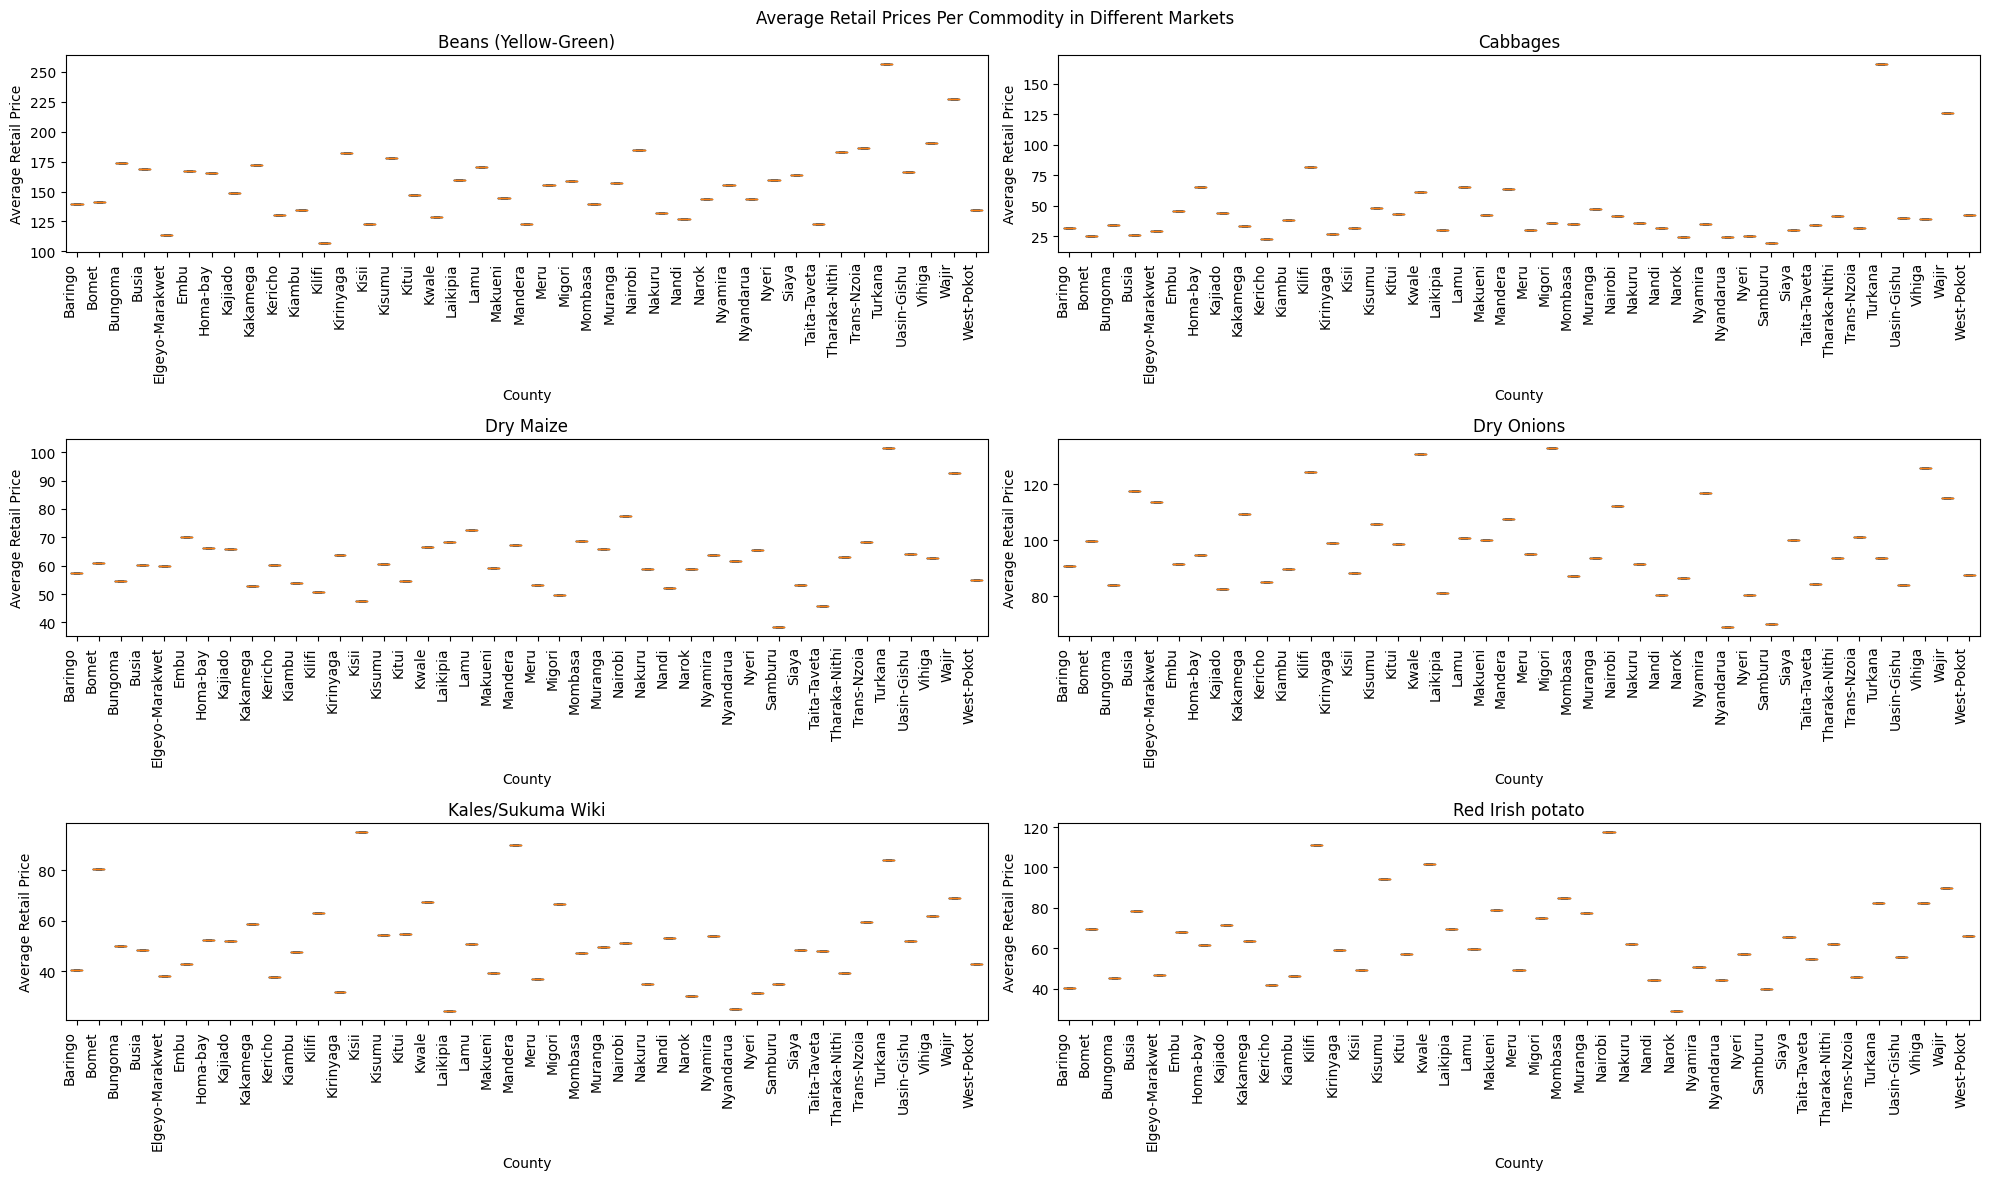

In [66]:
# Filter the data from 2015 onwards

# Calculate average retail prices per commodity and market
df_avg = products_df.groupby(['Commodity', 'County'], as_index=False)['Retail'].mean()

# Limit to top 6 most frequent commodities for better visualization
top_commodities = df_avg['Commodity'].value_counts().index[:6]
df_avg = df_avg[df_avg['Commodity'].isin(top_commodities)]

# Create a figure
plt.figure(figsize=(20, 12))  # Adjust the figure width for better spacing
plt.suptitle("Average Retail Prices Per Commodity in Different Markets")

# Get unique commodities for subplots
commodities = df_avg['Commodity'].unique()

# Number of subplots (one per commodity)
n_cols = 2  # Set the number of columns for subplot layout
n_rows = len(commodities) // n_cols + (1 if len(commodities) % n_cols != 0 else 0)

# Loop through the commodities to create each subplot
for i, commodity in enumerate(commodities):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    # Filter the data for the current commodity
    df_commodity = df_avg[df_avg['Commodity'] == commodity]
    
    # Create the boxplot for the commodity
    ax.boxplot([df_commodity[df_commodity['County'] == county]['Retail'] for county in df_commodity['County'].unique()])
    
    # Set the labels and title
    ax.set_xticklabels(df_commodity['County'].unique(), rotation=90, ha='right')
    ax.set_xlabel('County')
    ax.set_ylabel('Average Retail Price')
    ax.set_title(commodity)

# Adjust spacing for readability
plt.subplots_adjust(hspace=0.6, wspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()


**Cabbages:** Turkana, West Pokot, and Marsabit have the highest cabbage prices. These counties are remote, arid/semi-arid, and distant from major agricultural centers, leading to high transportation costs and likely limited local production due to harsh environmental conditions.

**Dry Maize:** Turkana, Laikipia, and Lamu show high maize prices.  Turkana and Lamu face challenges similar to those mentioned for cabbages (remoteness, aridity), limiting local maize production. Laikipia, while not as remote as Turkana, may have limited suitable land for maize cultivation and also faces challenges with water availability, driving up prices due to reliance on external supply.

**Dry Onions:** Nakuru, Migori, and Busia have high onion prices. Onions are perishable and require proper storage.  These counties may lack adequate storage facilities, leading to losses and higher prices to compensate.  Additionally, transportation costs and local supply/demand dynamics could be contributing factors.

**Kales/Sukuma Wiki:** Bomet, Kisii, Meru, and Turkana have high prices.  While kales/sukuma wiki are often locally grown, these specific counties may have experienced lower than usual local production due to seasonal variations, pest infestations, or other localized agricultural challenges. Turkana's remoteness likely adds to the cost.

**Irish Potato:** Kilifi, Nairobi, Kisumu, and Kwale show high potato prices.  Potatoes, like onions, require proper storage, and these counties might face similar storage and transportation challenges. Nairobi, as a major urban center, likely has high demand, which could also contribute to higher prices.

**Beans:** Turkana and Marsabit have high bean prices. These remote and arid counties likely face significant challenges in producing enough beans locally, leading to reliance on supplies from other regions, which drives up prices due to transportation costs.

**Rice:** Uasin Gishu, Kirinyaga, and West Pokot have high rice prices.  While some of these counties might be known for rice production, they may be experiencing local shortages due to drought, reduced acreage under cultivation, or high demand relative to supply.  West Pokot's remote location likely adds to the cost.

## Sentiment Analysis

In the sentiment analysis section, we aim to analyze the public sentiment regarding the prices and availability of various commodities in Kenya. This involves collecting and processing textual data, in this case social media posts, to determine the overall sentiment (positive, negative, or neutral) expressed by individuals. By applying natural language processing (NLP) techniques, we can extract insights into how people feel about different commodities, identify trends, and correlate these sentiments with actual market data. This analysis can help us understand the impact of public perception on commodity prices and supply, and provide valuable information for stakeholders in the agricultural sector.

**The VADER library**

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool specifically tailored to sentiments expressed in social media. It is simple to use and provides a good balance between computational efficiency and accuracy. VADER is particularly effective for analyzing short, informal texts like tweets and comments, making it ideal for our analysis. Additionally, VADER is capable of handling negations, slang, and emojis, which are common in social media posts, further enhancing its suitability for this task.

In [ ]:
# # Set the directory containing your CSV files
# tweets_csv_directory = ".\\scripts\\Twitter"  # Replace with the path to your directory

# # Use glob to match all CSV files in the directory
# tweet_csv_files = glob.glob(os.path.join(tweets_csv_directory, '*.csv'))

# # Define the expected column names (update these with your actual column names)
# column_names = ['column1', 'column2', 'column3', 'column4', "column5"]  # Replace with actual column names

# # Initialize an empty list to hold DataFrames
# tweets_data_frames = []

# # Iterate over the list of CSV files
# for file in tweet_csv_files:
#     # Read each CSV file into a DataFrame, explicitly passing column names
#     try:
#         tweet_df = pd.read_csv(file, header=None, names=column_names)  # Read without header and assign column names
#         tweets_data_frames.append(tweet_df)
#     except Exception as e:
#         print(f"Error reading {file}: {e}")

# # Concatenate all DataFrames in the list into a single DataFrame
# tweets_combined_df = pd.concat(tweets_data_frames, ignore_index=True)

# # Check the combined DataFrame for any unexpected columns
# print(tweets_combined_df.isna().value_counts())

# # Write the cleaned DataFrame to a CSV file
# # output_file = "combined_tweets.csv"
# # tweets_combined_df.to_csv(output_file, index=False)


In [68]:
# Loading the combined tweets dataset
combined_tweets = pd.read_csv('combined_tweets.csv')
combined_tweets.head()


,column1,column2,column3,column4,column5
0,Username,Text,Created At,Retweets,Likes
1,PETER MAYA 🇺🇸,Food constitutes 54% of household expenditures...,Thu Sep 12 10:42:45 +0000 2024,13,13
2,Monicah Sey 🇰🇪🇺🇸,"In just 2 years of his administration, the Ken...",Wed Sep 18 06:56:05 +0000 2024,17,12
3,#EndAbductionsKE,The key factors driving the high cost of livin...,Sat Oct 21 08:04:34 +0000 2023,9,9
4,The Dawn (Jossy..y Murage)🇰🇪🇱🇷,By recognizing that food constitutes 54% of ho...,Thu Sep 12 08:30:27 +0000 2024,33,12


In [69]:
# Adding appropriate header names to the dataframe
if 'combined_tweets.csv' not in os.listdir():
    combined_tweets = pd.read_csv('combined_tweets.csv')
    combined_tweets.columns = ['Username', 'Text', 'Created At', 'Retweets', 'Likes']
    combined_tweets.columns = combined_tweets.iloc[0]
    combined_tweets = combined_tweets[1:]
    combined_tweets.to_csv('combined_tweets.csv', index=False)
else:
    combined_tweets = pd.read_csv('combined_tweets.csv')
combined_tweets.columns = ['Username', 'Text', 'Created At', 'Retweets', 'Likes']
combined_tweets.columns = combined_tweets.iloc[0]
combined_tweets = combined_tweets[1:]
combined_tweets.head()

,Username,Text,Created At,Retweets,Likes
1,PETER MAYA 🇺🇸,Food constitutes 54% of household expenditures...,Thu Sep 12 10:42:45 +0000 2024,13,13
2,Monicah Sey 🇰🇪🇺🇸,"In just 2 years of his administration, the Ken...",Wed Sep 18 06:56:05 +0000 2024,17,12
3,#EndAbductionsKE,The key factors driving the high cost of livin...,Sat Oct 21 08:04:34 +0000 2023,9,9
4,The Dawn (Jossy..y Murage)🇰🇪🇱🇷,By recognizing that food constitutes 54% of ho...,Thu Sep 12 08:30:27 +0000 2024,33,12
5,Kenyans.co.ke,We want to better the economy of Kenya by help...,Tue Sep 03 14:04:36 +0000 2024,17,90


**Applying VADER**

The VADER (Valence Aware Dictionary and sEntiment Reasoner) model will analyze the `Text` column in the following steps:

1. **Text Preprocessing**: The text data in the `Text` column will be preprocessed to remove any unnecessary characters, such as URLs, mentions, and special characters.

2. **Sentiment Analysis**: The VADER model will be applied to each text entry in the `Text` column. VADER uses a combination of a sentiment lexicon and grammatical rules to assign sentiment scores to the text. It evaluates the text for positive, negative, and neutral sentiment components.

3. **Sentiment Score Calculation**: For each text entry, VADER will calculate a compound sentiment score, which is a normalized, weighted composite score that ranges from -1 (most negative) to +1 (most positive).

4. **Assigning Sentiment Scores**: The calculated sentiment scores will be assigned to a new column in the DataFrame, named `Sentiment`.



In [70]:
# importing necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the sentiment analysis to the 'Text' column
combined_tweets['Sentiment'] = combined_tweets['Text'].apply(get_sentiment)

# Display the updated DataFrame with sentiment scores
combined_tweets.head()

,Username,Text,Created At,Retweets,Likes,Sentiment
1,PETER MAYA 🇺🇸,Food constitutes 54% of household expenditures...,Thu Sep 12 10:42:45 +0000 2024,13,13,0.0000
2,Monicah Sey 🇰🇪🇺🇸,"In just 2 years of his administration, the Ken...",Wed Sep 18 06:56:05 +0000 2024,17,12,-0.2960
3,#EndAbductionsKE,The key factors driving the high cost of livin...,Sat Oct 21 08:04:34 +0000 2023,9,9,-0.2023
4,The Dawn (Jossy..y Murage)🇰🇪🇱🇷,By recognizing that food constitutes 54% of ho...,Thu Sep 12 08:30:27 +0000 2024,33,12,0.0000
5,Kenyans.co.ke,We want to better the economy of Kenya by help...,Tue Sep 03 14:04:36 +0000 2024,17,90,0.6597


A sentiment column has been added with sentiment scores at the end of every tweet record

**Distribution of sentiments**

Average Sentiment: 0.16775915427509297


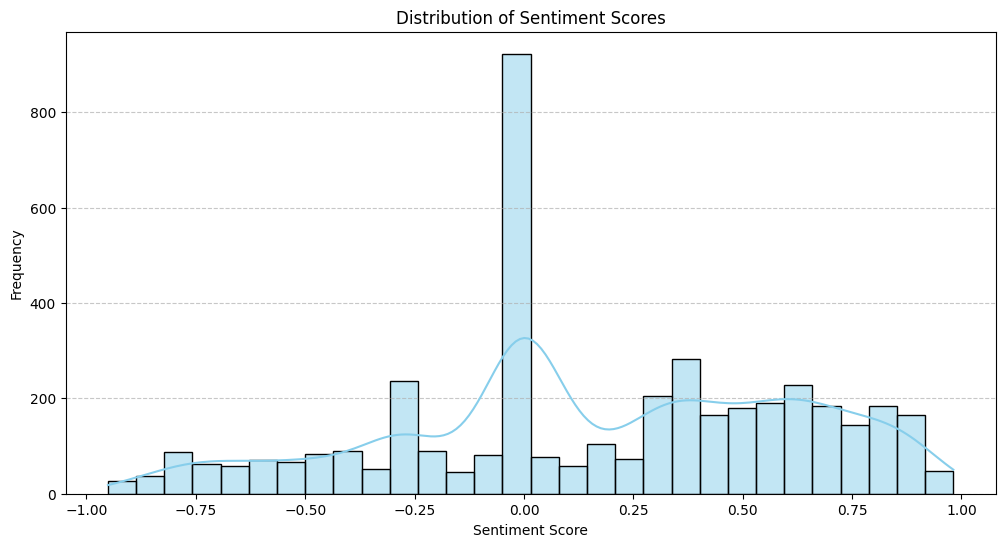

In [79]:
# Calculate the average sentiment
average_sentiment = combined_tweets['Sentiment'].mean()

# Print the average sentiment
print("Average Sentiment:", average_sentiment)

# Plotting the distribution of sentiment scores
# 4. Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(combined_tweets['Sentiment'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A score of 0.16775915427509297 suggests that, on average, the text data contains more positive sentiments than negative ones, but the positivity is not very strong. This could imply that while there are positive expressions in the data, they are relatively mild or balanced by some neutral or slightly negative sentiments.


The graph on the other hand shows the distribution of sentiment scores from social media posts regarding the prices and availability of various commodities in Kenya.

- **Histogram Interpretation**:
    - The x-axis represents the sentiment scores, ranging from -1 (most negative) to +1 (most positive).
    - The y-axis represents the frequency of posts with corresponding sentiment scores.
    - The bars show the number of posts falling within specific sentiment score ranges.

- **Sentiment Score Distribution**:
    - The distribution provides insights into the overall public sentiment towards commodity prices and availability.
    - A higher frequency of positive sentiment scores indicates a generally favorable perception, while a higher frequency of negative scores suggests dissatisfaction or concern.

- **Insights**:
    - The graph indicates predominantly positive sentiment scores, with a peak around +0.5. This suggests that most social media posts express positive views on commodity prices and availability.
    - There are fewer posts with negative sentiment scores, indicating that negative perceptions are less common among social media users.
    - Neutral sentiments are the most predominant, indicating most users express moderate views on commodity-related issues.


**Average sentiments over time**

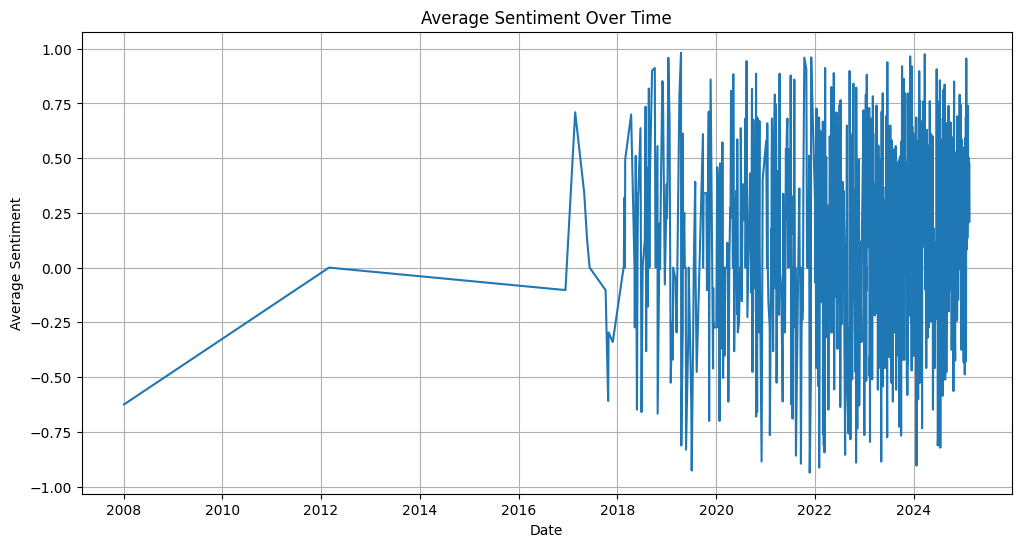

In [72]:
# Convert 'Created At' to datetime, skipping the header row
combined_tweets = combined_tweets[1:]
combined_tweets['Created At'] = pd.to_datetime(combined_tweets['Created At'], errors='coerce')

# 1. Sentiment Over Time
combined_tweets['Date'] = combined_tweets['Created At'].dt.date
sentiment_over_time = combined_tweets.groupby('Date')['Sentiment'].mean()

plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, linestyle='-')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

The above visualization indicates huge fluctuation in user's sentiments, indicating the volatility of emotion, and the importance of using such temporal data in a timely manner. 

**Users with the most positive and negative sentiments**

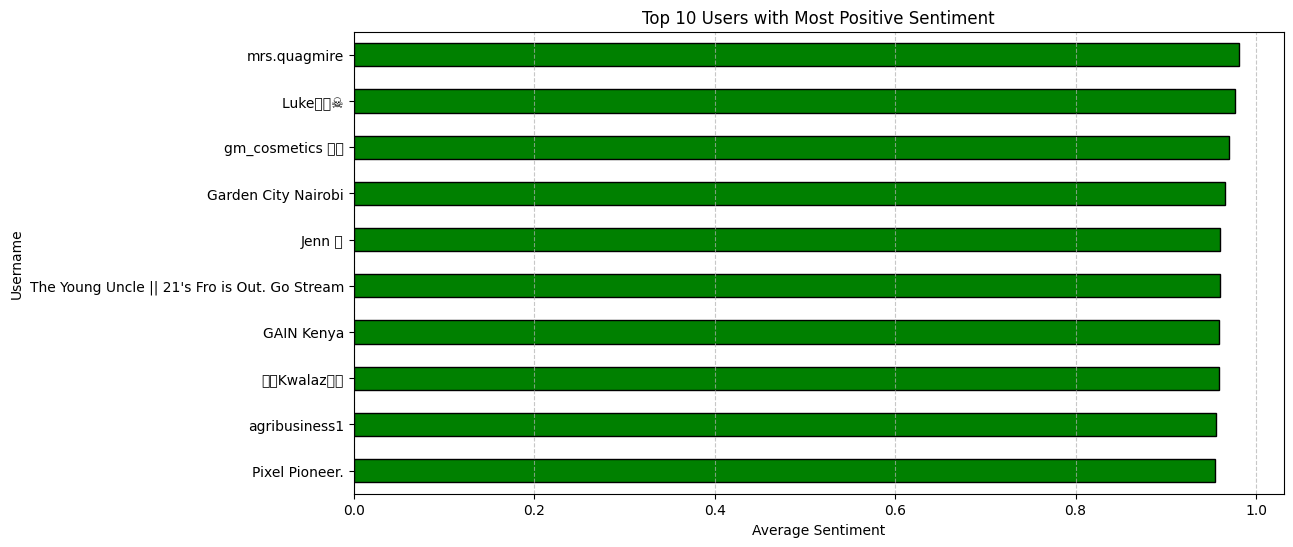

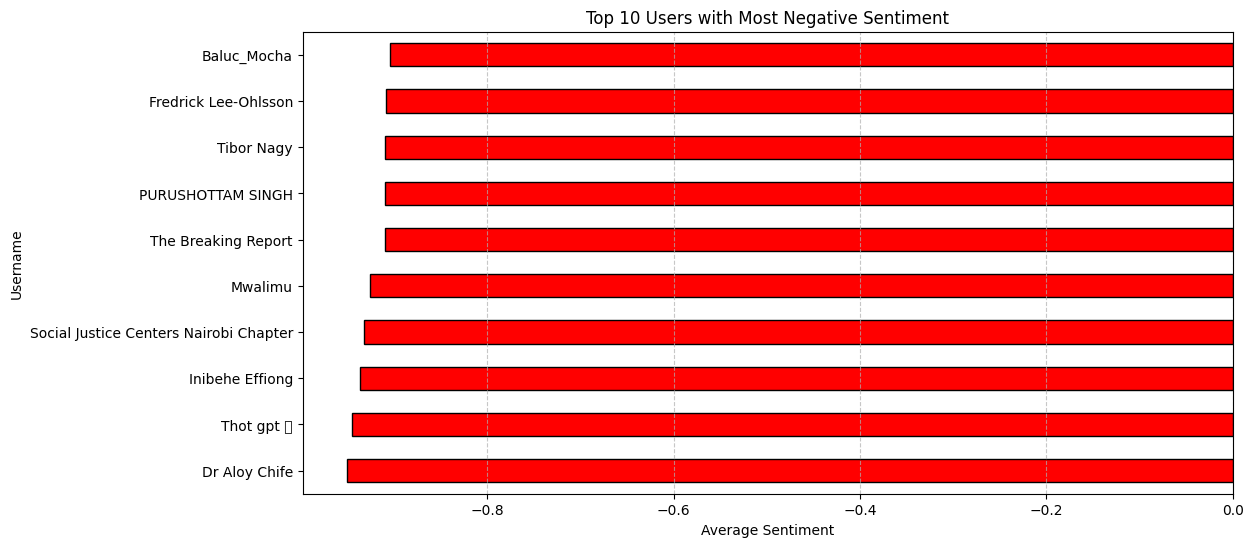

In [73]:
# 2. Sentiment by User
user_sentiment = combined_tweets.groupby('Username')['Sentiment'].mean().sort_values()

plt.figure(figsize=(12, 6))
user_sentiment.tail(10).plot(kind='barh', color='green', edgecolor='black')
plt.title('Top 10 Users with Most Positive Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Username')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
user_sentiment.head(10).plot(kind='barh', color='red', edgecolor='black')
plt.title('Top 10 Users with Most Negative Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Username')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Plotting a graph of users with the most positive and most negative sentiments is important for several reasons:

1. **Identifying Key Influencers**: By identifying users who consistently express strong positive or negative sentiments, we can pinpoint key influencers in the discussion. These users may have a significant impact on public opinion and can be valuable for targeted marketing or public relations efforts.

2. **Understanding Public Perception**: Analyzing the sentiments of different users helps us understand the overall public perception of the commodities. It provides insights into how different segments of the population feel about the prices and availability of various commodities.

3. **Detecting Anomalies**: Users with extreme sentiments may indicate potential anomalies or issues that need to be addressed. For example, a user with consistently negative sentiments might be highlighting genuine problems that require attention.

4. **Enhancing Customer Engagement**: By identifying users with strong sentiments, businesses and policymakers can engage with them more effectively. Positive users can be leveraged as brand advocates, while negative users can be approached to resolve their concerns and improve their experience.

5. **Improving Sentiment Analysis**: Understanding the distribution of sentiments among users helps in refining sentiment analysis models. It provides a clearer picture of the sentiment landscape and can guide improvements in the analysis process.


In [75]:
# Convert Retweets and Likes columns to numeric
combined_tweets['Retweets'] = pd.to_numeric(combined_tweets['Retweets'], errors='coerce')
combined_tweets['Likes'] = pd.to_numeric(combined_tweets['Likes'], errors='coerce')

# Calculate the correlation between sentiment and retweets
correlation_retweets = combined_tweets['Sentiment'].corr(combined_tweets['Retweets'])
print(f"Correlation between Sentiment and Retweets: {correlation_retweets}")

# Calculate the correlation between sentiment and likes
correlation_likes = combined_tweets['Sentiment'].corr(combined_tweets['Likes'])
print(f"Correlation between Sentiment and Likes: {correlation_likes}")


Correlation between Sentiment and Retweets: -0.03419156633695188
Correlation between Sentiment and Likes: -0.010139806766234176


The near-zero negative correlations observed suggest that tweet sentiment has minimal impact on retweets and likes. This underscores the complexity of user engagement behaviors and highlights the need to consider a broader range of factors when analyzing social media interactions.

## MODELLING

### Data Preparation

In [80]:
# importing necessary libraries
from scipy.stats import skew

# Select relevant numerical columns
numerical_cols = ["Wholesale", "Retail", "Supply Volume", "Markup %"]

# Compute skewness
skewness_values = products_df[numerical_cols].skew()

# Display skewness
print(skewness_values)


Wholesale        3.492466
Retail           3.443262
Supply Volume    5.201852
Markup %         8.896632
dtype: float64


In [81]:
import numpy as np

# Apply log transformation (log1p = log(1 + x) to handle zeros safely)
products_df["Wholesale_log"] = np.log1p(products_df["Wholesale"])
products_df["Retail_log"] = np.log1p(products_df["Retail"])
products_df["Supply_Volume_log"] = np.log1p(products_df["Supply Volume"])

# Handle negative values in Markup % (shift values before log)
products_df["Markup_log"] = np.log1p(products_df["Markup %"] - products_df["Markup %"].min() + 1)


In [82]:
# Select relevant numerical columns
log_numerical_cols = ["Wholesale_log", "Retail_log", "Supply_Volume_log", "Markup %"]

# Compute skewness
log_skewness_values = products_df[log_numerical_cols].skew()

# Display skewness
print(log_skewness_values)

Wholesale_log        0.237717
Retail_log           0.315041
Supply_Volume_log   -0.444529
Markup %             8.896632
dtype: float64


In [83]:
from scipy.stats import boxcox

products_df["Markup_boxcox"], lambda_val = boxcox(products_df["Markup %"] - products_df["Markup %"].min() + 1)  
print("Optimal Lambda:", lambda_val)  # Check the transformation parameter


Optimal Lambda: -0.10948045480568318


In [84]:
print(products_df["Markup_boxcox"].skew())


-0.1912869415851625


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = products_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Save to a CSV file
corr_matrix.to_csv("correlation_matrix.csv")

ValueError: could not convert string to float: 'Meat Beef'

In [ ]:
# importing modelling libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

**BASELINE XGBoost MODEL**

In [ ]:
# Select features based on correlation analysis
features = ["Wholesale", "Supply Volume", "Wholesale_log", "Markup %"]
target = "Retail"  # Replace with your actual target column

# Split data into X (features) and y (target)
products_df = products_df[products_df["Date"].dt.year > 2020]

X = products_df[features]
y = products_df[target]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
xgb_model = XGBRegressor(objective='reg:squarederror', #use squared error for regression
                         n_estimators=100, #trians 100 boosting rounds
                         learning_rate=0.1, #control step size to balance leraning speed and overfitting
                         max_depth=5, # limit tree depth to prevent complexity
                         random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 1.0721
RMSE: 2.7332
R² Score: 0.9993


**Explanation**

The selected features: Wholesale, Supply Volume, Wholesale_log, Markup % were chosen based on the correlation analysis since they likely have a strong relationship with the target variable, Retail.

MAE: 1.0721 → On average, predictions are kshs. 1.42 off from actual values.

RMSE: 2.7332 → Penalizes larger errors; suggests most predictions are within ±3.22 of true values.

R² Score: 0.9993 → The model explains 99.92% of variance which is extremely high, meaning the model fits the training data almost perfectly.

**TUNED MODEL 1**

This model introduces several modifications aimed at improving generalization and preventing overfitting. These include:
* Lowering complexity (fewer trees & smaller depth).
* Using more randomness (subsampling data & features).
* Implementing early stopping to prevent unnecessary training.

In [ ]:
xgb_model_2 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=50,  # Reduce tree count to lower complexity and training time
    learning_rate=0.05,  # Smaller learning rate
    max_depth=3,  # Reduce depth to reduce risk of overfitting
    subsample=0.8,  # Use 80% of data per tree to improve generalization
    colsample_bytree=0.8,  # Use 80% of features per tree to reduce redundancy
    random_state=42
)
xgb_model_2.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    eval_metric="mae", 
    early_stopping_rounds=10,  # Stop early if no improvement
    verbose=False)

# Predict
y_pred_2 = xgb_model_2.predict(X_test)

# Evaluate model
mae_2 = mean_absolute_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))
r2_2 = r2_score(y_test, y_pred_2)

print(f"MAE: {mae_2:.4f}")
print(f"RMSE: {rmse_2:.4f}")
print(f"R² Score: {r2_2:.4f}")

#cross validation to assess generalization

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = -cross_val_score(xgb_model_2, X, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(xgb_model_2, X, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores = cross_val_score(xgb_model_2, X, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")

MAE: 13.0880
RMSE: 23.8503
R² Score: 0.9475
Cross-Validation MAE: 13.1790 ± 0.1409
Cross-Validation RMSE: 23.7757 ± 0.2652
Cross-Validation R²: 0.9483 ± 0.0013


**Cross-Validation Results (5-fold):**

MAE: 13.1790 ± 0.1409 → Very similar to test set MAE, suggesting consistent performance.

RMSE: 23.7757 ± 0.2652 → Stable RMSE across different splits.

R²: 0.9483 ± 0.0013 → High consistency, meaning the model generalizes better than the baseline.

Summary: This model is less accurate than the baseline, meaning some predictive power was sacrificed for better generalization. Prediction error increased and larger errors were more penalized.

**TUNED MODEL 2**

This model aimed to enhance generalization while improving predictive accuracy by:

* Modifying features to capture non-linear relationships by introducing (adding Markup_log, removing Wholesale).
* Increasing tree count for better learning.
* Applying L1 & L2 regularization (Ridge and Lasso) to reduce overfitting.
* Using a slightly deeper tree (max_depth=4) for better feature interaction.

In [ ]:
features_2 = ["Supply Volume", "Wholesale_log", "Markup %", "Markup_log"]

X_2 = products_df[features_2]

# Split data into training and testing sets (80-20 split)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=4)

xgb_model_3 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  # Increased from 3 to 4  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=0.5,  # use L2 regularization(ridge) 
    reg_alpha=0.05,  # use L1 regularization (lasso) 
    random_state=42
)

xgb_model_3.fit(
    X_train_2, y_train_2, 
    eval_set=[(X_test_2, y_test_2)], 
    eval_metric="mae",  
    early_stopping_rounds=15,  
    verbose=False
)

# Predict
y_pred_3 = xgb_model_3.predict(X_test_2)

# Evaluate model
mae_3 = mean_absolute_error(y_test_2, y_pred_3)
rmse_3 = np.sqrt(mean_squared_error(y_test_2, y_pred_3))
r2_3 = r2_score(y_test_2, y_pred_3)

print(f"MAE: {mae_3:.4f}")
print(f"RMSE: {rmse_3:.4f}")
print(f"R² Score: {r2_3:.4f}")

# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)

# mae_scores_3= -cross_val_score(xgb_model_3, X_2, y, cv=tscv, scoring='neg_mean_absolute_error')
# print(f"Time-Based CV MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_3 = -cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores_3 = np.sqrt(-cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_3 = cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores_3.mean():.4f} ± {mae_scores_3.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores_3.mean():.4f} ± {rmse_scores_3.std():.4f}")
print(f"Cross-Validation R²: {r2_scores_3.mean():.4f} ± {r2_scores_3.std():.4f}")

MAE: 3.0605
RMSE: 5.7859
R² Score: 0.9969
Cross-Validation MAE: 2.9881 ± 0.1863
Cross-Validation RMSE: 6.0020 ± 0.5169
Cross-Validation R²: 0.9967 ± 0.0005


* Improved Accuracy: MAE & RMSE significantly reduced from Model 1.
* Balanced Complexity & Generalization: Regularization & cross-validation ensure stable performance.
* Slight Risk of Overfitting: The R² is very high, but cross-validation supports its robustness.

**Evaluate Real-World Generalization of Model 3**

This experiment aims to test how well Model 3 generalizes to future data, for example records from 2023 & beyond, by:

* Training on historical data (records up to 2022 ).
* Testing on completely unseen data (records from 2023 onward).
* Assessing performance to check if the model maintains accuracy outside the training period.

In [ ]:
# Split data by time period: Train on records before 2022, Test on 2023 & beyond
train_df = products_df[products_df["Date"].dt.year <= 2022]
test_df = products_df[products_df["Date"].dt.year > 2022]

# Select features and target
X_train_new = train_df[features_2]
y_train_new = train_df["Retail"]  

X_test_new = test_df[features_2]
y_test_new = test_df["Retail"]

# Check split sizes
print(f"Training Data: {X_train_new.shape}, Testing Data: {X_test_new.shape}")

# Initialize XGBoost model with similar parameters to xgb_model_3
xgb_model_unseen = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=0.5,  
    reg_alpha=0.05,  
    random_state=42
)

# Train on past data only
xgb_model_unseen.fit(
    X_train_new, y_train_new,
    eval_set=[(X_test_new, y_test_new)],
    eval_metric="mae",
    early_stopping_rounds=15,
    verbose=False
)
# Predict on unseen data
y_pred_unseen = xgb_model_unseen.predict(X_test_new)

# Evaluate performance
mae_unseen = mean_absolute_error(y_test_new, y_pred_unseen)
rmse_unseen = np.sqrt(mean_squared_error(y_test_new, y_pred_unseen))
r2_unseen = r2_score(y_test_new, y_pred_unseen)

print(f"Unseen Data MAE: {mae_unseen:.4f}")
print(f"Unseen Data RMSE: {rmse_unseen:.4f}")
print(f"Unseen Data R² Score: {r2_unseen:.4f}")

Training Data: (80874, 4), Testing Data: (43429, 4)
Unseen Data MAE: 4.0789
Unseen Data RMSE: 9.9242
Unseen Data R² Score: 0.9929


Despite testing on completely unseen data, the model still performs well.
* On average, the model's predictions are off by kshs. 4.08.
* The model’s standard deviation from actual values by kshs. 9.92.
* R2 is however still high since the model explains 99.29% of the variability in retail prices.

**Feature Importance**

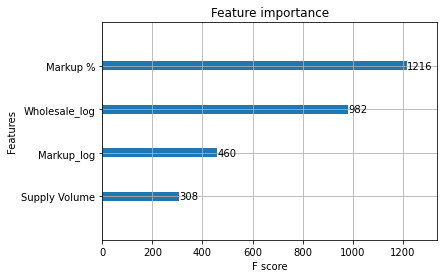

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model_unseen, importance_type="weight")
plt.show()


Looking at the feature importance score of xgboost_model_3, Markup % (1216) is the most important feature which might be make the model too confident leading to high R² scores.  

Removing Markup % and remaining with Markup_log which has lower importance(460) might help address the overfitting.

**TUNED MODEL 3**

The goal of training the next model was to reduce overfitting and improve the model's ability to generalize to unseen data by:

* Removing Markup %, which had an extremely high importance scoreand reducing the model’s reliance on a single dominant feature.
* Increasing Ridge and Lasso Regularization to prevent overfitting

In [ ]:
features_3 = ["Supply Volume", "Wholesale_log", "Markup_log"]

X_3 = products_df[features_3]

# Split data into training and testing sets (80-20 split)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=42)



xgb_model_4 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  # Increased from 3 to 4  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=2.0,  # Increase L2 regularization (Ridge)  
    reg_alpha=0.1,  # Increase L1 regularization (Lasso)  
    random_state=42
)

xgb_model_4.fit(
    X_train_3, y_train_3, 
    eval_set=[(X_test_3, y_test_3)], 
    eval_metric="mae",  
    early_stopping_rounds=15,  
    verbose=False
)

# Predict
y_pred_4 = xgb_model_4.predict(X_test_3)

# Evaluate model
mae_4 = mean_absolute_error(y_test_3, y_pred_4)
rmse_4 = np.sqrt(mean_squared_error(y_test_3, y_pred_4))
r2_4 = r2_score(y_test_3, y_pred_4)

print(f"MAE: {mae_4:.4f}")
print(f"RMSE: {rmse_4:.4f}")
print(f"R² Score: {r2_4:.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_4 = -cross_val_score(xgb_model_4, X_3, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores_4 = np.sqrt(-cross_val_score(xgb_model_4, X_3, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_4 = cross_val_score(xgb_model_4, X_3, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores_4.mean():.4f} ± {mae_scores_4.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores_4.mean():.4f} ± {rmse_scores_4.std():.4f}")
print(f"Cross-Validation R²: {r2_scores_4.mean():.4f} ± {r2_scores_4.std():.4f}")

MAE: 4.7733
RMSE: 10.6938
R² Score: 0.9894
Cross-Validation MAE: 4.8589 ± 0.1000
Cross-Validation RMSE: 10.5186 ± 0.2009
Cross-Validation R²: 0.9899 ± 0.0004


The increase in error metrics suggests that the model is now less fine-tuned to the training data but potentially more robust to unseen data.
The drop in R² means the model now generalizes better.

We tested it on unseen data to assess how well it generalizes.

In [ ]:
# Split data: Train on records before 2021, Test on 2021 & beyond
train_df_2 = products_df[products_df["Date"].dt.year <= 2022]
test_df_2 = products_df[products_df["Date"].dt.year > 2022]

# Select features and target
X_train_new_2 = train_df_2[features_3]
y_train_new_2 = train_df_2["Retail"]  

X_test_new_2 = test_df_2[features_3]
y_test_new_2 = test_df_2["Retail"]

# Check split sizes
print(f"Training Data: {X_train_new_2.shape}, Testing Data: {X_test_new_2.shape}")

# Initialize XGBoost model with similar metrics to xgb_model_4
xgb_model_unseen_2 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=2,  
    reg_alpha=0.1,  
    random_state=42
)

# Train on past data only
xgb_model_unseen_2.fit(
    X_train_new_2, y_train_new_2,
    eval_set=[(X_test_new_2, y_test_new_2)],
    eval_metric="mae",
    early_stopping_rounds=15,
    verbose=False
)
# Predict on unseen data
y_pred_unseen_2 = xgb_model_unseen_2.predict(X_test_new_2)

# Evaluate performance
mae_unseen_2 = mean_absolute_error(y_test_new_2, y_pred_unseen_2)
rmse_unseen_2 = np.sqrt(mean_squared_error(y_test_new_2, y_pred_unseen_2))
r2_unseen_2 = r2_score(y_test_new_2, y_pred_unseen_2)

print(f"Unseen Data MAE: {mae_unseen_2:.4f}")
print(f"Unseen Data RMSE: {rmse_unseen_2:.4f}")
print(f"Unseen Data R² Score: {r2_unseen_2:.4f}")

Training Data: (80874, 3), Testing Data: (43429, 3)
Unseen Data MAE: 5.4530
Unseen Data RMSE: 13.8154
Unseen Data R² Score: 0.9863


The model generalizes well even on unseen data but shows a slight increase in error metrics on unseen data.

**Feature Importance**

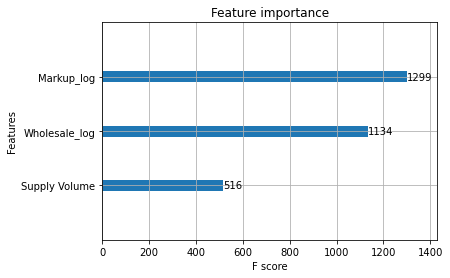

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model_unseen_2, importance_type="weight")
plt.show()


Feature importance scores show that this model does not disproportionately depend on only one feature.

**TUNED MODEL 4**

This tuned model added Interaction terms to help capture non linear relatiinships betweeen features better:
* Markup_Wholesale: Multiplies Markup % with Wholesale_log to capture how markup and wholesale price interact.
* Markup_Supply: Divides Markup % by Supply Volume to account for how markup changes relative to supply availability.

In [ ]:
# Define features, including interaction terms
products_df["Markup_Wholesale"] = products_df["Markup %"] * products_df["Wholesale_log"]
products_df["Markup_Supply"] = products_df["Markup %"] / (products_df["Supply Volume"] + 1e-6)  # Avoid division by zero

features_optimized = ["Wholesale_log", "Supply Volume", "Markup %", "Markup_log", "Markup_Wholesale", "Markup_Supply"]
X_optimized = products_df[features_optimized]

# Split data into training and testing sets (80-20 split)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_optimized, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor with optimized hyperparameters
xgb_optimized = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=150,  # Reduced to prevent overfitting
    learning_rate=0.02,  # Slower learning for better generalization
    max_depth=3,  # Shallower tree to avoid overfitting
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=2.0,  # Increased L2 regularization
    reg_alpha=0.05,  
    random_state=42
)

# Train the model
xgb_optimized.fit(
    X_train_opt, y_train_opt, 
    eval_set=[(X_test_opt, y_test_opt)], 
    eval_metric="mae",  
    early_stopping_rounds=15,  
    verbose=False
)

# Predict
y_pred_opt = xgb_optimized.predict(X_test_opt)

# Evaluate model
mae_opt = mean_absolute_error(y_test_opt, y_pred_opt)
rmse_opt = np.sqrt(mean_squared_error(y_test_opt, y_pred_opt))
r2_opt = r2_score(y_test_opt, y_pred_opt)

print(f"MAE: {mae_opt:.4f}")
print(f"RMSE: {rmse_opt:.4f}")
print(f"R² Score: {r2_opt:.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_opt = -cross_val_score(xgb_optimized, X_optimized, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores_opt = np.sqrt(-cross_val_score(xgb_optimized, X_optimized, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_opt = cross_val_score(xgb_optimized, X_optimized, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores_opt.mean():.4f} ± {mae_scores_opt.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores_opt.mean():.4f} ± {rmse_scores_opt.std():.4f}")
print(f"Cross-Validation R²: {r2_scores_opt.mean():.4f} ± {r2_scores_opt.std():.4f}")

MAE: 13.9200
RMSE: 24.1230
R² Score: 0.9463
Cross-Validation MAE: 13.7377 ± 0.4852
Cross-Validation RMSE: 23.8490 ± 0.6130
Cross-Validation R²: 0.9480 ± 0.0025


On average, the model misses the actual retail price by around kshs. 11.28 

RMSE is higher menaing pricing errors in extreme cases are costly.

96.28% of the variability in retail prices is explained by the model meaning it generalizes much better.

In [ ]:
# # RNN MODELS (LSTM & GRU) for Retail Price Prediction

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error

# rnn_df = products_df

# # Sort dataset by date to maintain time order
# rnn_df = rnn_df.sort_values(by='Date')

# # Define the features and target variable for the RNN model
# rnn_feature_cols = ["Wholesale_log", "Supply Volume", "Markup_log"]  # Adjust based on your dataset
# rnn_target_variable = "Retail"  # Target variable for price prediction

# # Split into train and test while maintaining temporal order
# train_size = 0.8  # 80% train, 20% test
# train_df, test_df = train_test_split(rnn_df, train_size=train_size, shuffle=False)  # No shuffle to maintain time series order

# # Initialize scalers for normalizing input features and target variable
# rnn_scaler_X = MinMaxScaler()
# rnn_scaler_y = MinMaxScaler()

# # Fit the scalers on the training data and transform both train & test sets
# train_df[rnn_feature_cols] = rnn_scaler_X.fit_transform(train_df[rnn_feature_cols])
# test_df[rnn_feature_cols] = rnn_scaler_X.transform(test_df[rnn_feature_cols])

# train_df[[rnn_target_variable]] = rnn_scaler_y.fit_transform(train_df[[rnn_target_variable]])
# test_df[[rnn_target_variable]] = rnn_scaler_y.transform(test_df[[rnn_target_variable]])

# # Function to create sequences for RNN models
# def rnn_create_sequences(data, target_col, feature_cols, lookback):
#     """
#     Creates time-series sequences for LSTM and GRU models.

#     Parameters:
#         - data: DataFrame containing features and target
#         - target_col: Name of the target column
#         - feature_cols: List of feature column names
#         - lookback: Number of previous time steps to consider as input

#     Returns:
#         - X: NumPy array of feature sequences
#         - y: NumPy array of target values
#     """
#     X, y = [], []
#     for i in range(len(data) - lookback):
#         X.append(data[feature_cols].iloc[i : i + lookback].values)  # Features over lookback period
#         y.append(data[target_col].iloc[i + lookback])  # Target at next step
#     return np.array(X), np.array(y)

# # Define different lookback window sizes
# rnn_lookback_windows = [7, 14, 30]  # Using 1-week, 2-week, and 1-month lookback periods
# rnn_data = {}  # Dictionary to store training and test sequences for each lookback window

# # Prepare sequence data for each lookback period
# for rnn_lookback in rnn_lookback_windows:
#     rnn_X_train, rnn_y_train = rnn_create_sequences(train_df, rnn_target_variable, rnn_feature_cols, rnn_lookback)
#     rnn_X_test, rnn_y_test = rnn_create_sequences(test_df, rnn_target_variable, rnn_feature_cols, rnn_lookback)
#     rnn_data[rnn_lookback] = (rnn_X_train, rnn_y_train, rnn_X_test, rnn_y_test)

# # Function to build LSTM/GRU models
# def rnn_build_model(model_type, lookback, feature_count):
#     """
#     Builds and compiles an LSTM or GRU model for time-series forecasting.

#     Parameters:
#         - model_type: "LSTM" or "GRU"
#         - lookback: Number of past time steps used for input
#         - feature_count: Number of features in the input data

#     Returns:
#         - Compiled RNN model
#     """
#     model = Sequential()
    
#     if model_type == "LSTM":
#         model.add(LSTM(64, return_sequences=True, input_shape=(lookback, feature_count)))  # First LSTM layer
#         model.add(LSTM(32, return_sequences=False))  # Second LSTM layer
#     elif model_type == "GRU":
#         model.add(GRU(64, return_sequences=True, input_shape=(lookback, feature_count)))  # First GRU layer
#         model.add(GRU(32, return_sequences=False))  # Second GRU layer
    
#     model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
#     model.add(Dense(16, activation='relu'))  # Fully connected hidden layer
#     model.add(Dense(1))  # Output layer with one neuron (for price prediction)
    
#     model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Compile the model using MSE loss and MAE metric
#     return model

# # Train and evaluate LSTM & GRU models for each lookback window
# rnn_results = []  # Store MAE results for comparison
# rnn_early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Early stopping

# for rnn_lookback in rnn_lookback_windows:
#     # Retrieve training and testing data for the given lookback window
#     rnn_X_train, rnn_y_train, rnn_X_test, rnn_y_test = rnn_data[rnn_lookback]
    
#     # Train LSTM Model
#     print(f"Training LSTM model with lookback: {rnn_lookback} days...")
#     rnn_lstm_model = rnn_build_model("LSTM", rnn_lookback, rnn_X_train.shape[2])
#     rnn_lstm_model.fit(
#         rnn_X_train, rnn_y_train, epochs=50, batch_size=32, 
#         validation_data=(rnn_X_test, rnn_y_test), 
#         callbacks=[rnn_early_stopping], verbose=1
#     )
#     rnn_lstm_pred = rnn_lstm_model.predict(rnn_X_test)

#     # Train GRU Model
#     print(f"Training GRU model with lookback: {rnn_lookback} days...")
#     rnn_gru_model = rnn_build_model("GRU", rnn_lookback, rnn_X_train.shape[2])
#     rnn_gru_model.fit(
#         rnn_X_train, rnn_y_train, epochs=50, batch_size=32, 
#         validation_data=(rnn_X_test, rnn_y_test), 
#         callbacks=[rnn_early_stopping], verbose=1
#     )
#     rnn_gru_pred = rnn_gru_model.predict(rnn_X_test)

#     # Inverse transform actual and predicted values to original scale
#     rnn_y_test_inv = rnn_scaler_y.inverse_transform(rnn_y_test.reshape(-1, 1))
#     rnn_lstm_pred_inv = rnn_scaler_y.inverse_transform(rnn_lstm_pred)
#     rnn_gru_pred_inv = rnn_scaler_y.inverse_transform(rnn_gru_pred)

#     # Calculate MAE on the original scale
#     rnn_lstm_mae = mean_absolute_error(rnn_y_test_inv, rnn_lstm_pred_inv)
#     rnn_gru_mae = mean_absolute_error(rnn_y_test_inv, rnn_gru_pred_inv)

#     # Store results for comparison
#     rnn_results.append((rnn_lookback, rnn_lstm_mae, rnn_gru_mae))
#     print(f"Lookback: {rnn_lookback} days - LSTM MAE: {rnn_lstm_mae:.2f}, GRU MAE: {rnn_gru_mae:.2f}")

# # Print final model performance comparison
# print("\nFinal Model Performance Comparison:")
# for rnn_lookback, lstm_mae, gru_mae in rnn_results:
#     print(f"Lookback: {rnn_lookback} days - LSTM MAE: {lstm_mae:.2f}, GRU MAE: {gru_mae:.2f}")
